# CAPSTONE PROJECT:- FOREST COVER TYPE PREDICTION

#### PROBLEM STATEMENT:- Predict the forest cover type (the predominate kind of trees cover) the strictly cartographic variables. This area  IS divided  in the Roosevelt National Forest of northern Colorado with 7 cover types in 4 wilderness area.

In [1]:
#importing all requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report,cohen_kappa_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
train = pd.read_csv('train1.csv')
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
#checking the shape of the dataset
train.shape

(15120, 56)

In [4]:
#checking the columns of the dataset
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [5]:
#checking  the datatypes of the columns
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [6]:
#checking for the missing values for dataset
train.isnull().sum().sum()

0

Therefore we can say that there are no missing values in the dataset

In [7]:
#checking any dupilicates in the id column
train['Id'].duplicated().sum()


0

In [8]:
#As  there are in duplicates in the id column we are dropping that column and saving as df
df=train.drop(columns='Id',axis=1)

In [9]:
# checking for no of unique values in a variable
for i in df.columns:
    print(i,': ',df[i].nunique())

Elevation :  1665
Aspect :  361
Slope :  52
Horizontal_Distance_To_Hydrology :  400
Vertical_Distance_To_Hydrology :  423
Horizontal_Distance_To_Roadways :  3250
Hillshade_9am :  176
Hillshade_Noon :  141
Hillshade_3pm :  247
Horizontal_Distance_To_Fire_Points :  2710
Wilderness_Area1 :  2
Wilderness_Area2 :  2
Wilderness_Area3 :  2
Wilderness_Area4 :  2
Soil_Type1 :  2
Soil_Type2 :  2
Soil_Type3 :  2
Soil_Type4 :  2
Soil_Type5 :  2
Soil_Type6 :  2
Soil_Type7 :  1
Soil_Type8 :  2
Soil_Type9 :  2
Soil_Type10 :  2
Soil_Type11 :  2
Soil_Type12 :  2
Soil_Type13 :  2
Soil_Type14 :  2
Soil_Type15 :  1
Soil_Type16 :  2
Soil_Type17 :  2
Soil_Type18 :  2
Soil_Type19 :  2
Soil_Type20 :  2
Soil_Type21 :  2
Soil_Type22 :  2
Soil_Type23 :  2
Soil_Type24 :  2
Soil_Type25 :  2
Soil_Type26 :  2
Soil_Type27 :  2
Soil_Type28 :  2
Soil_Type29 :  2
Soil_Type30 :  2
Soil_Type31 :  2
Soil_Type32 :  2
Soil_Type33 :  2
Soil_Type34 :  2
Soil_Type35 :  2
Soil_Type36 :  2
Soil_Type37 :  2
Soil_Type38 :  2
Soil_T

As we observed the columns has only unique values in cover type,soil types and wilderness area and the highest is 7 .So we are converting all of these to object

In [10]:
for i in df.columns:
    if df[i].nunique()<=7:
        df[i]=df[i].astype(str)

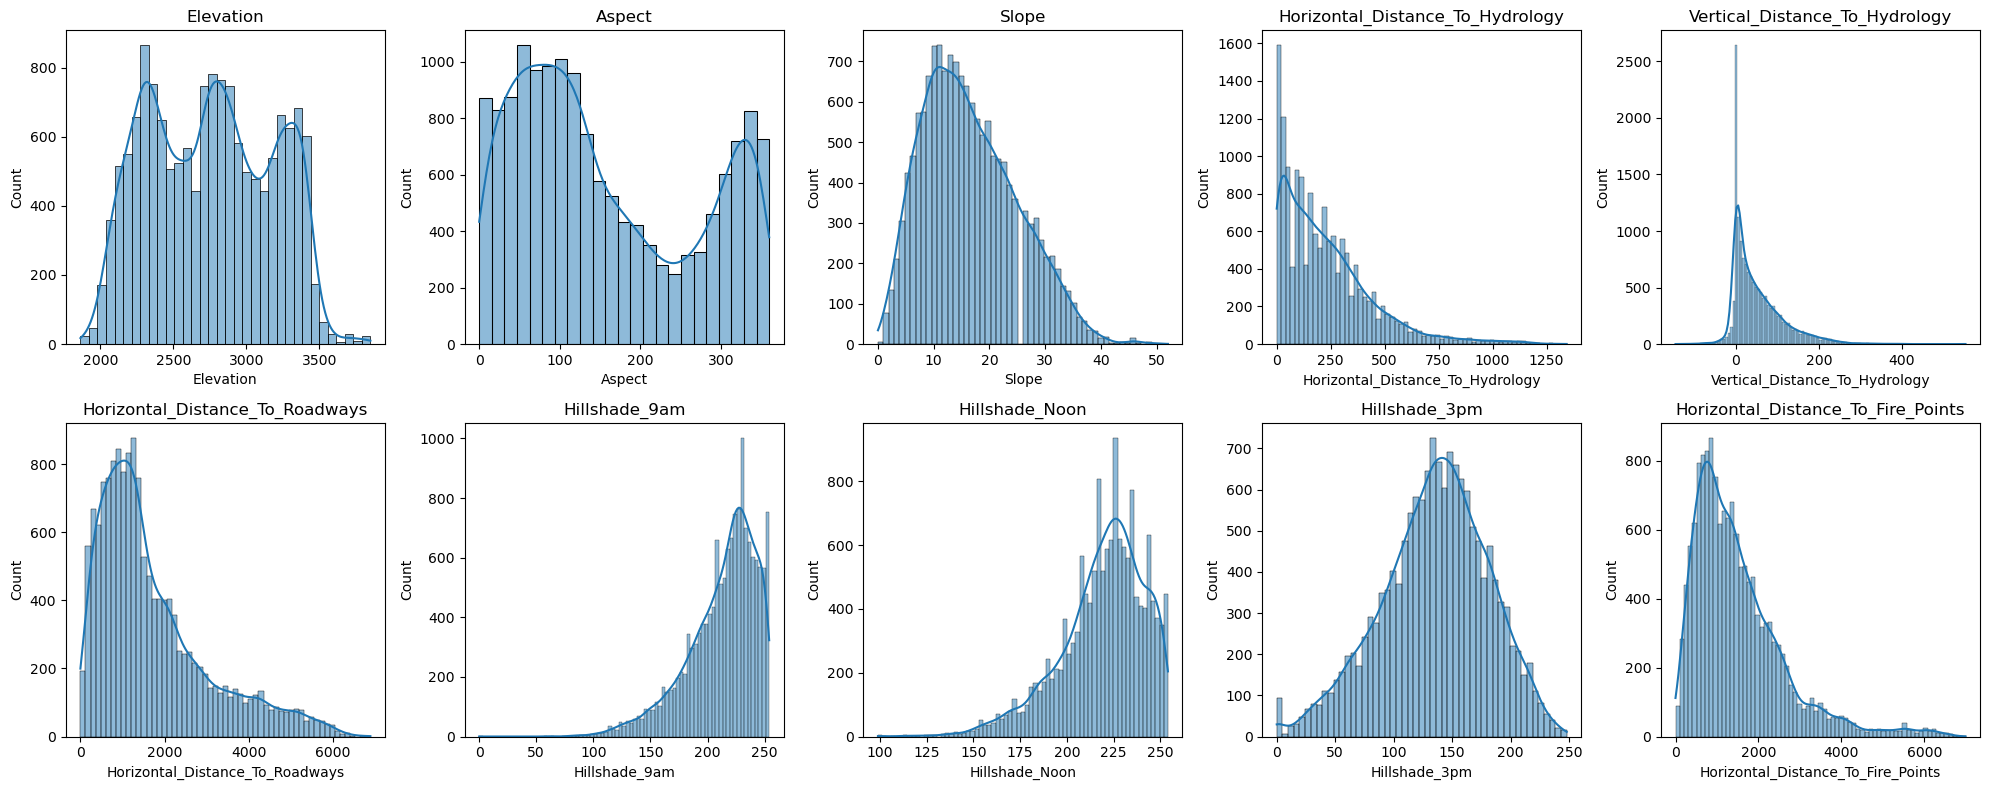

In [11]:
# Select columns with integer dtype
df_column = df.select_dtypes(include='int64')

# Set up the number of rows and columns in the subplot grid
num_cols = len(df_column.columns) // 2 + len(df_column.columns) % 2  # Adjust for odd number of variables
num_rows = 2

# Create subplots for each variable in 2 rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=( 4*num_cols,8))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Plot distplots for each variable
for i, column in enumerate(df_column.columns):
    sns.histplot(df_column[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Remove empty subplots if the number of variables is odd
if len(df_column.columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

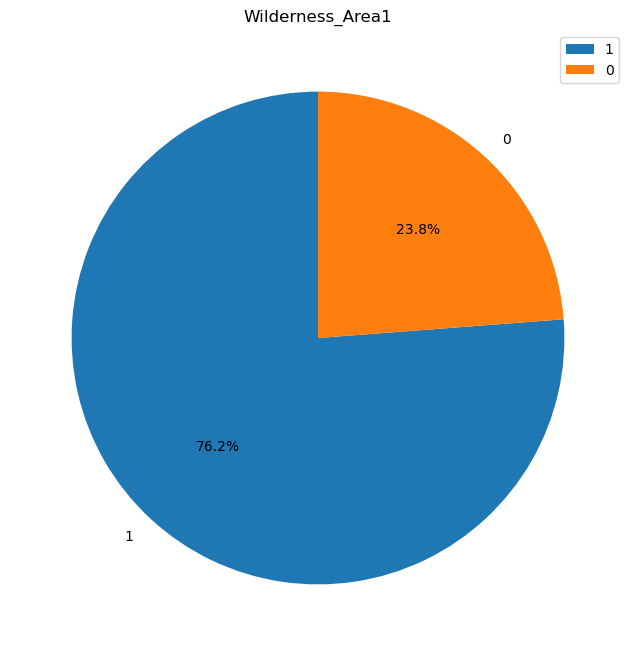

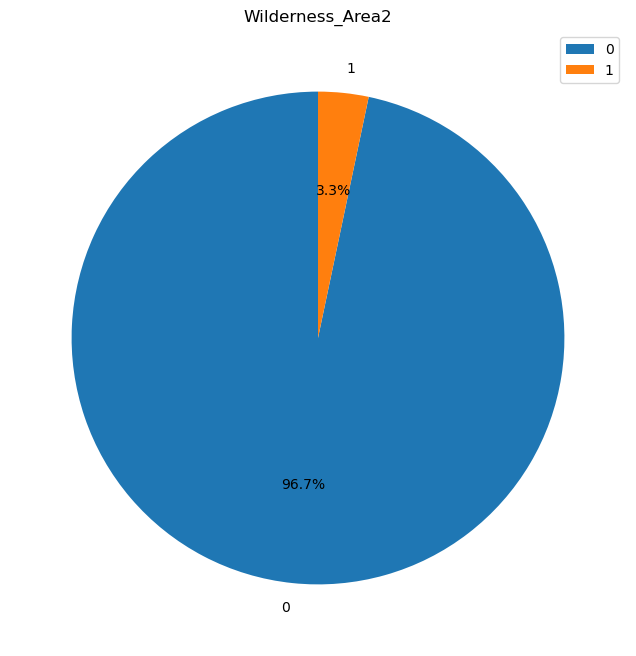

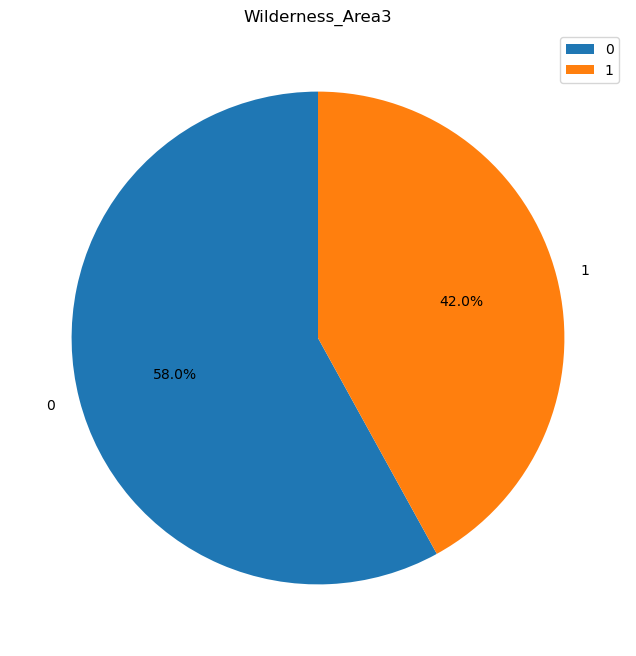

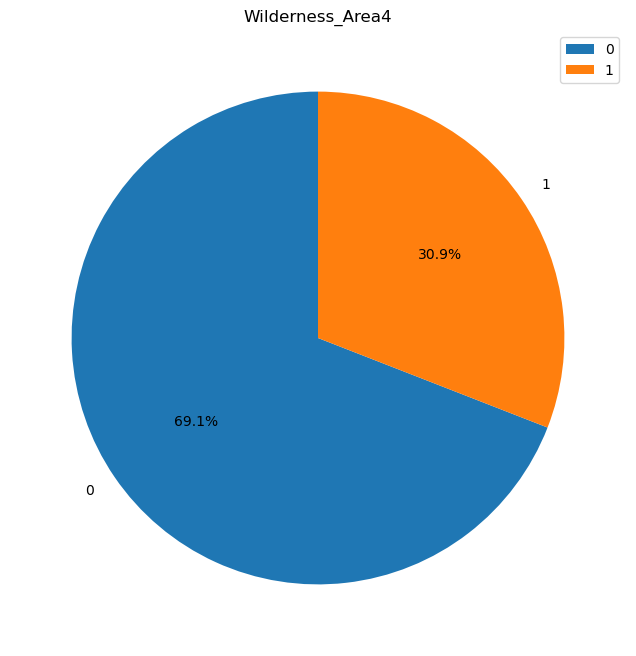

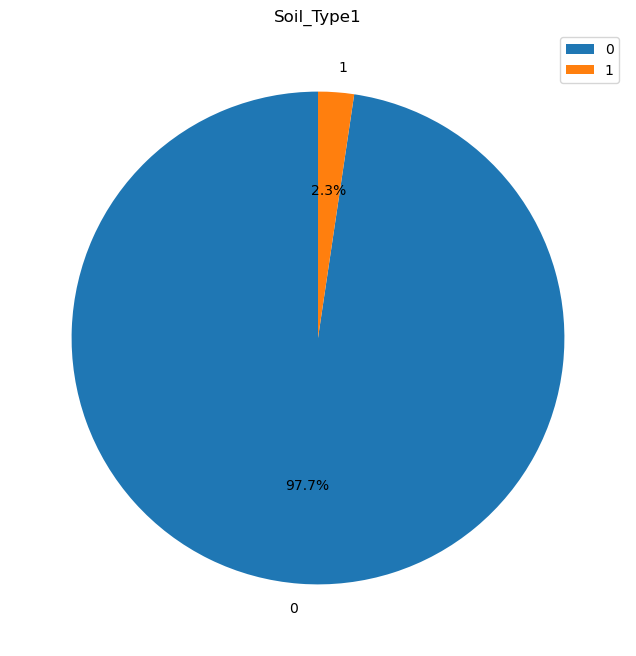

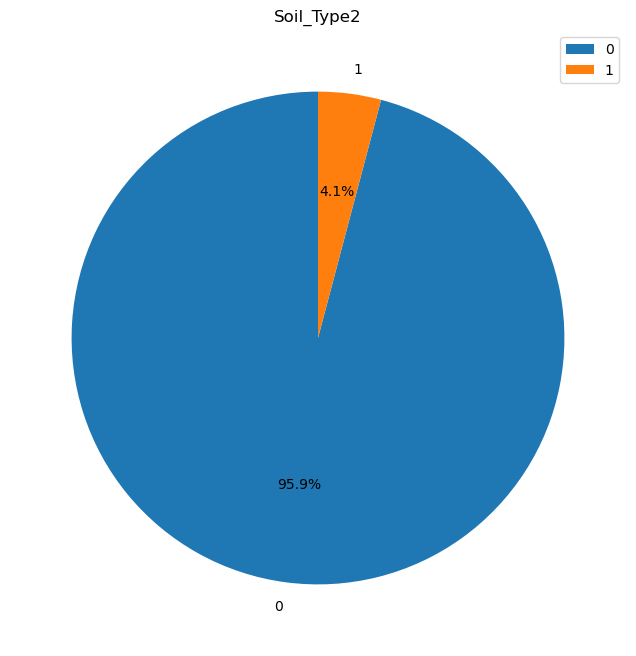

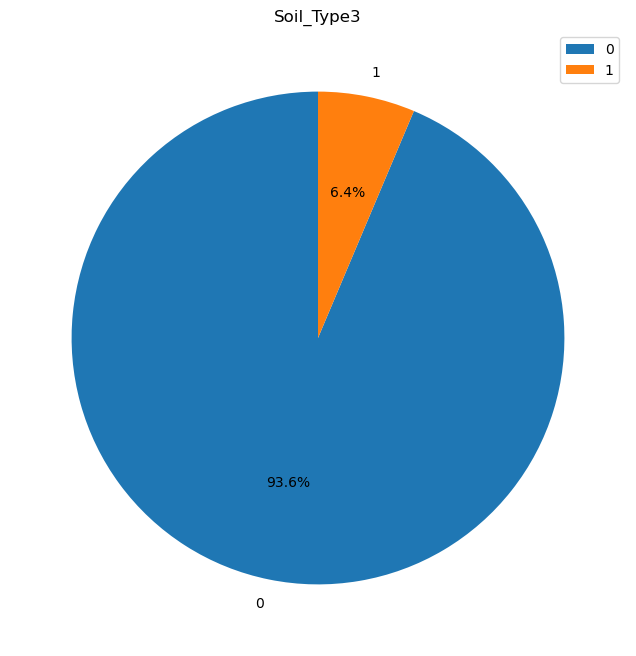

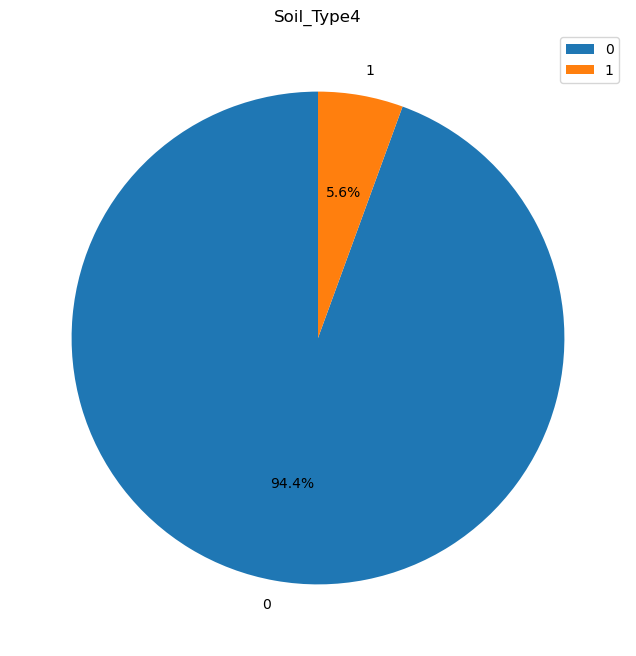

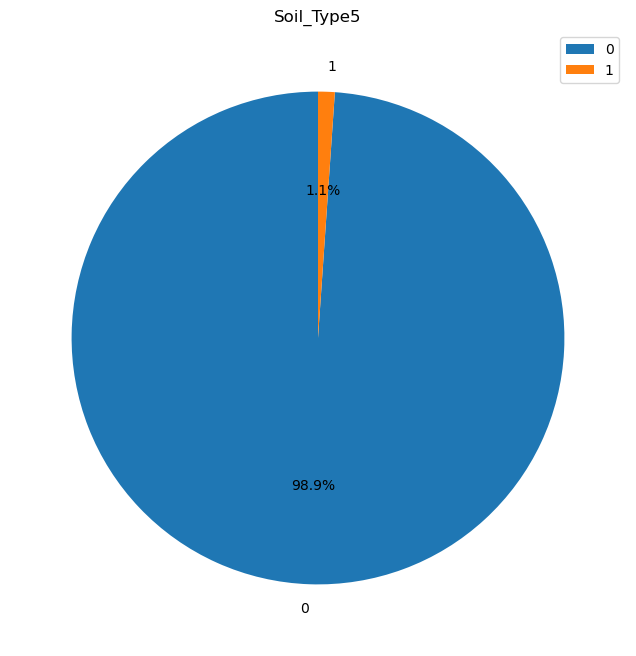

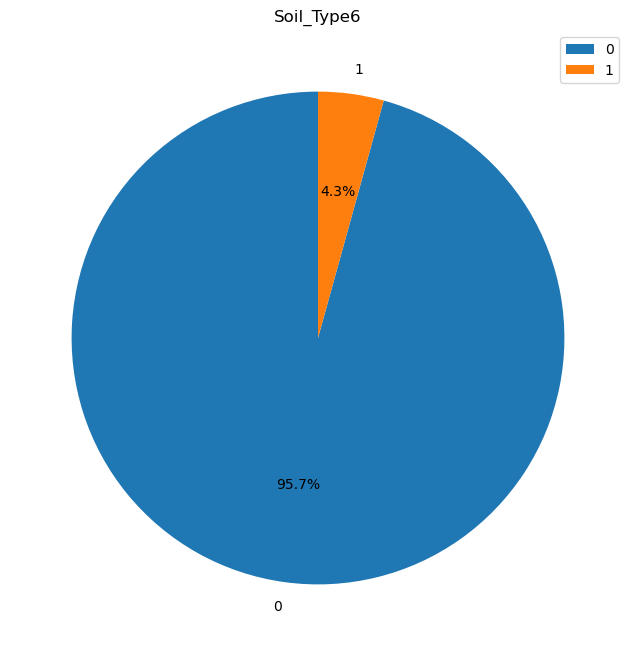

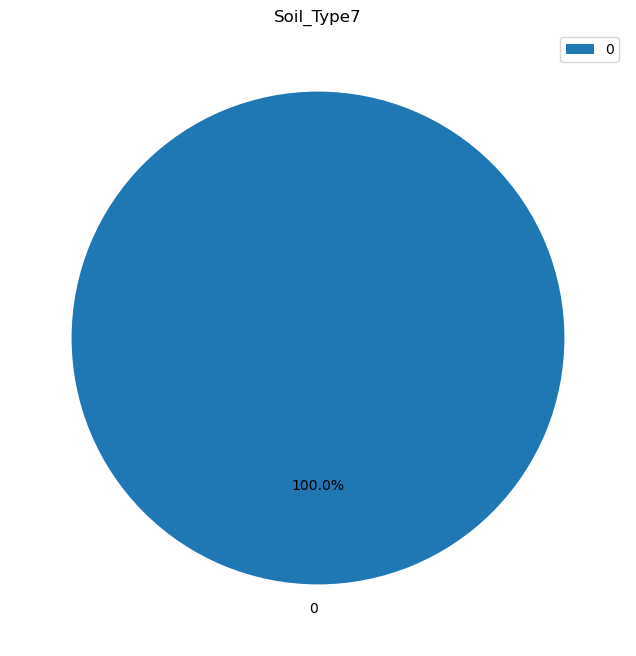

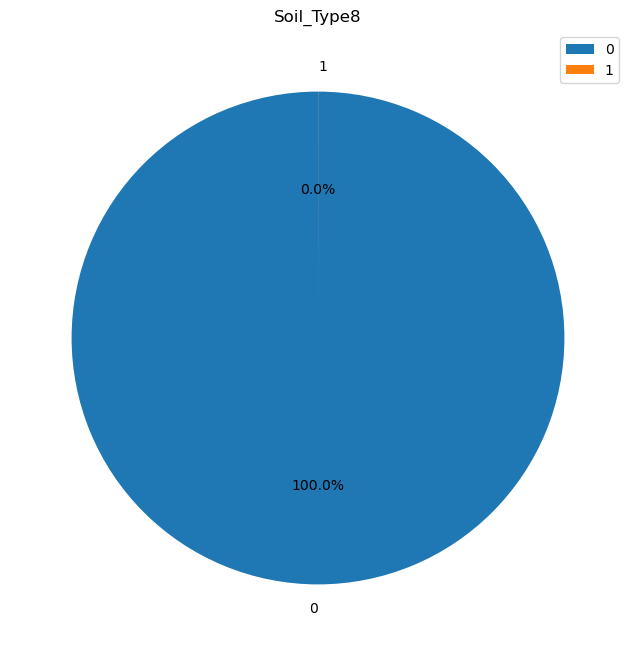

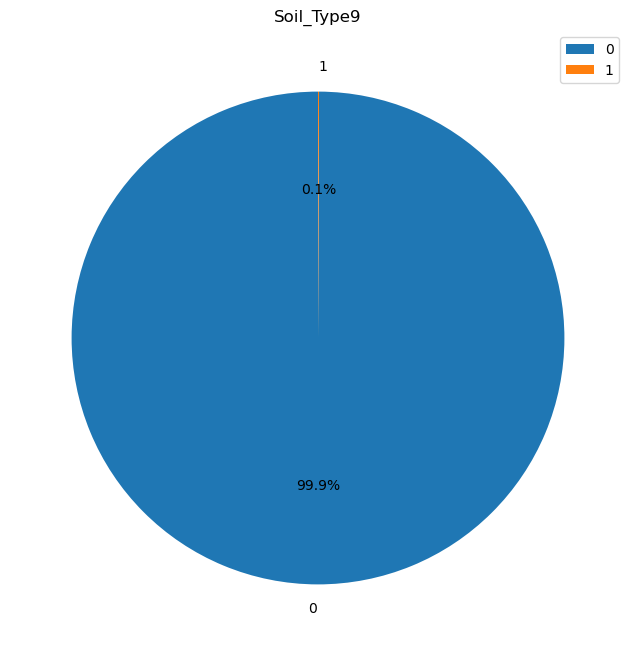

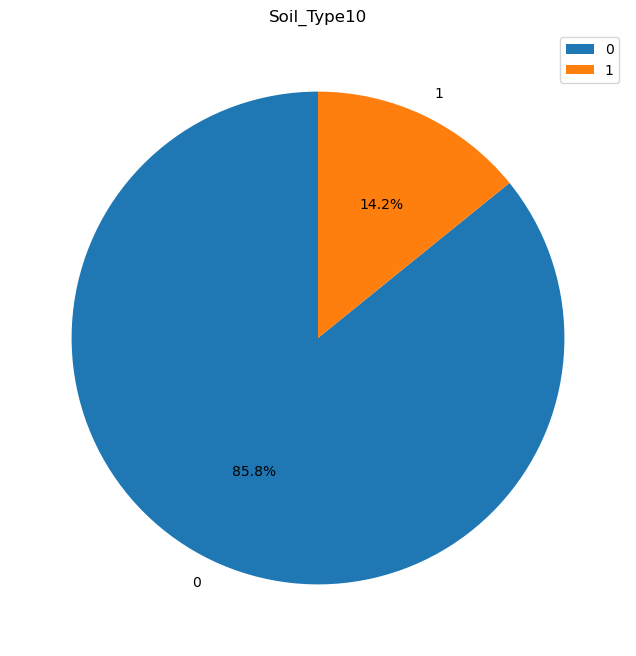

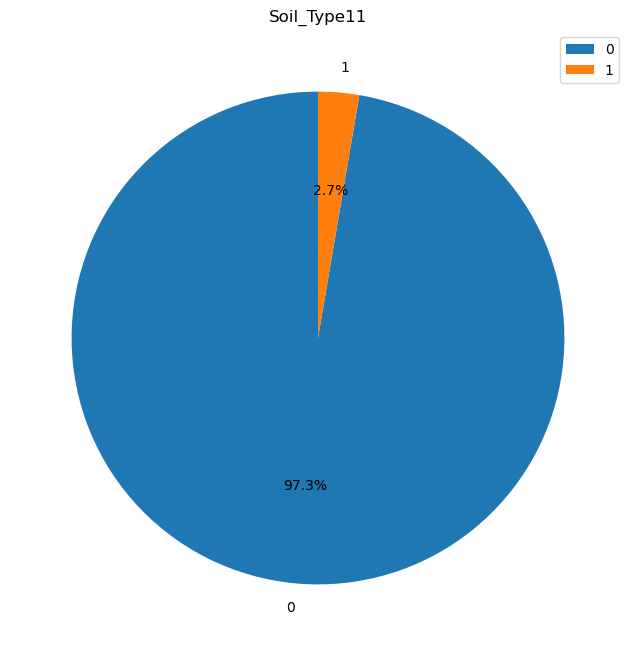

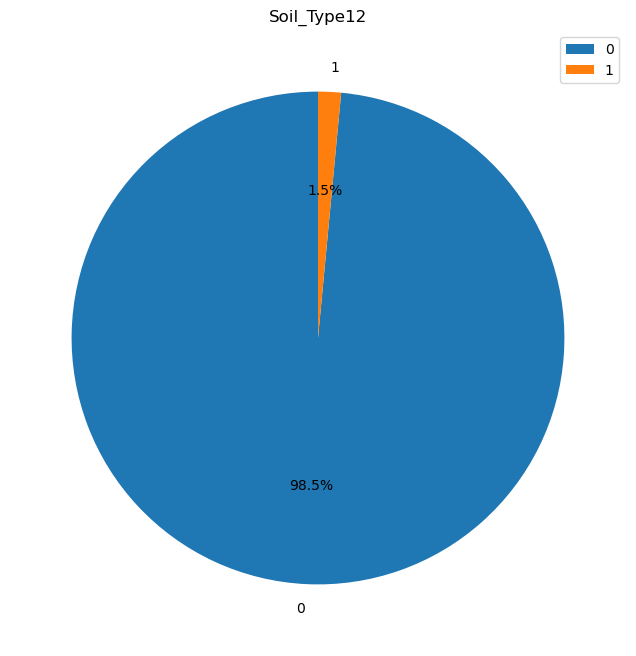

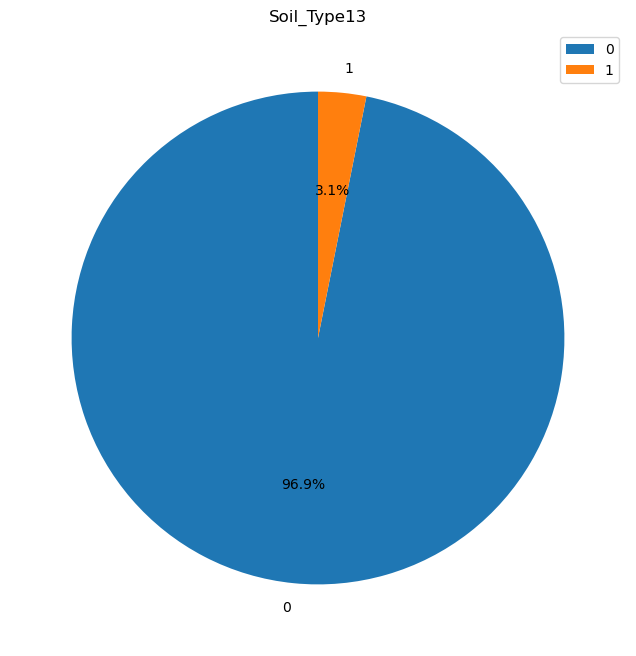

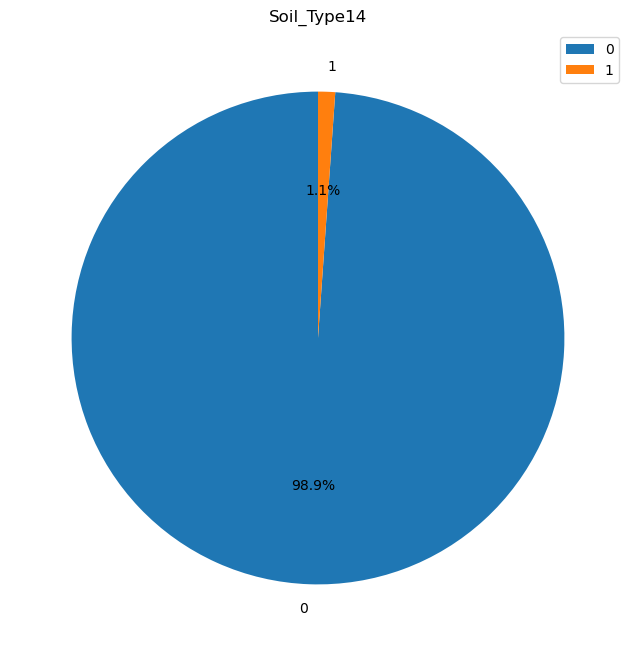

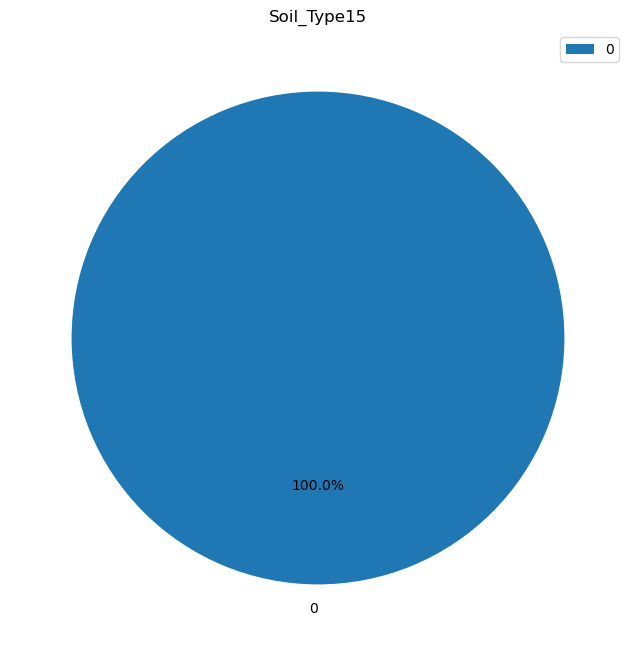

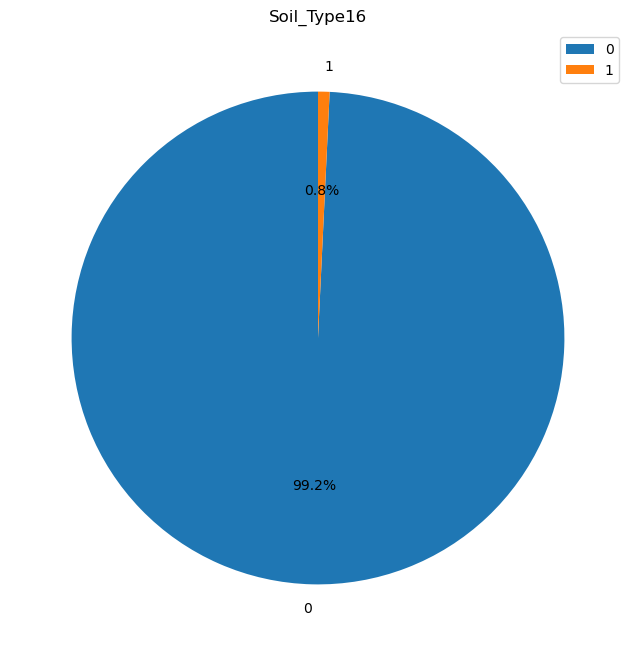

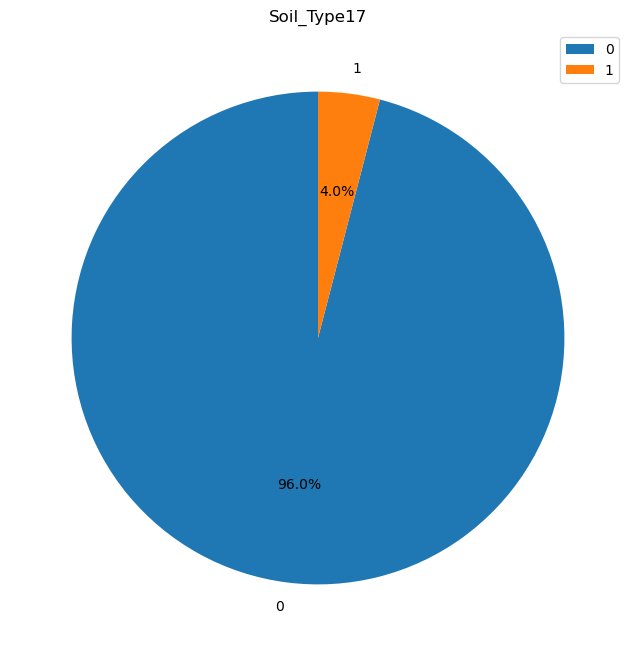

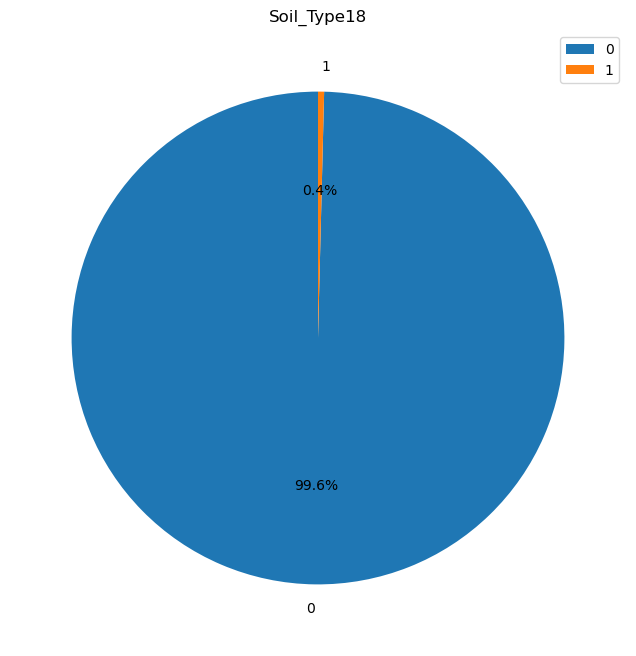

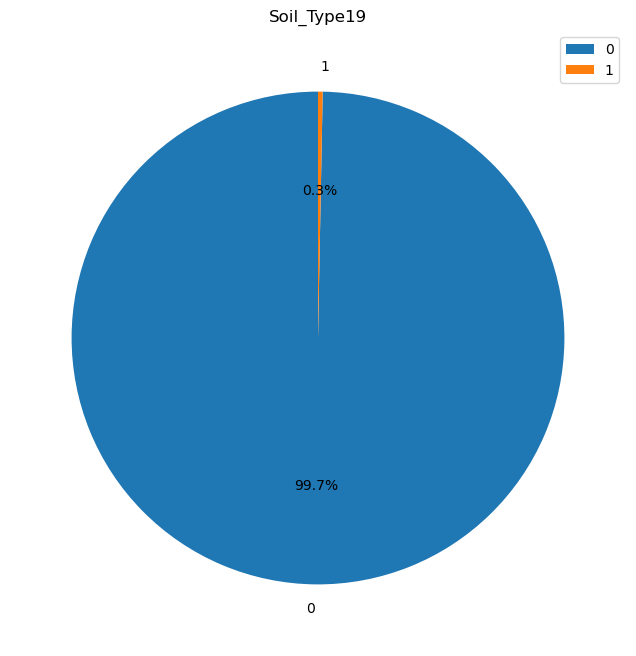

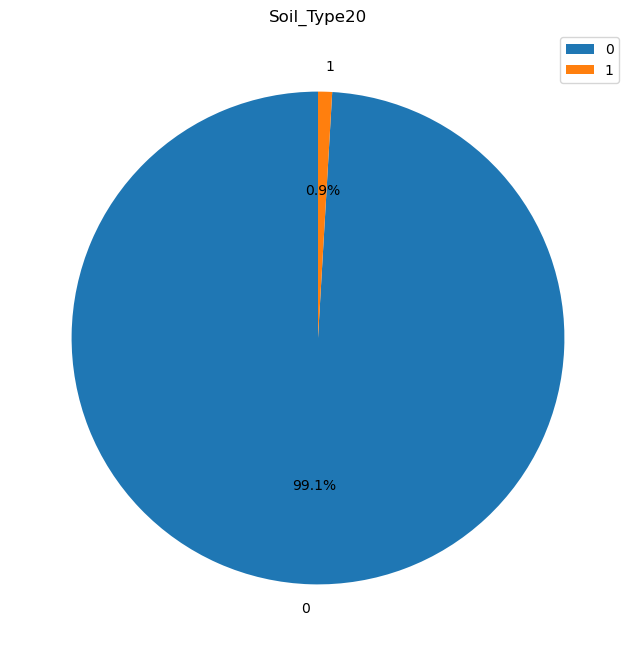

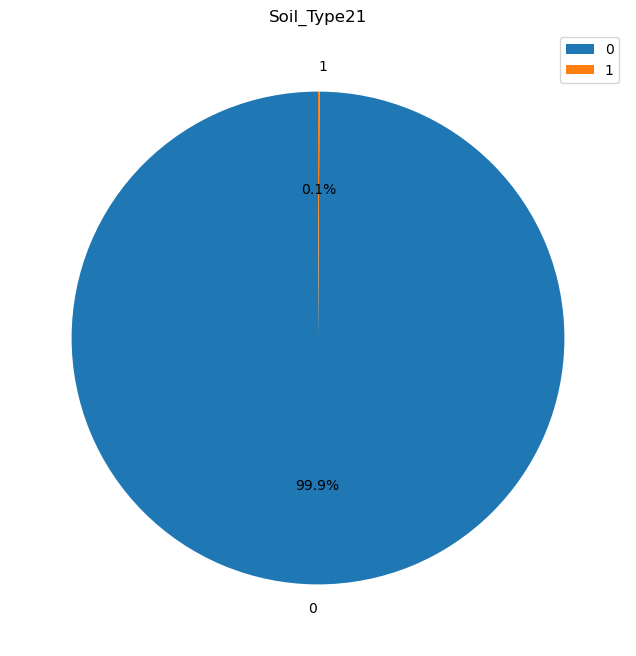

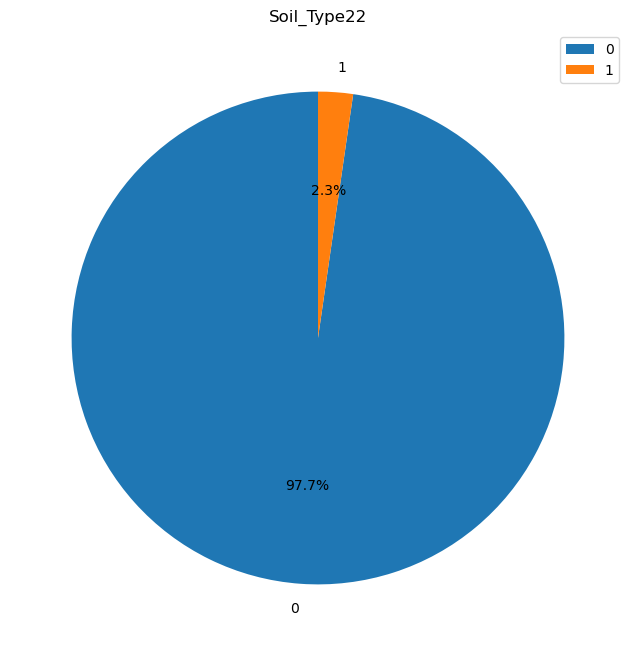

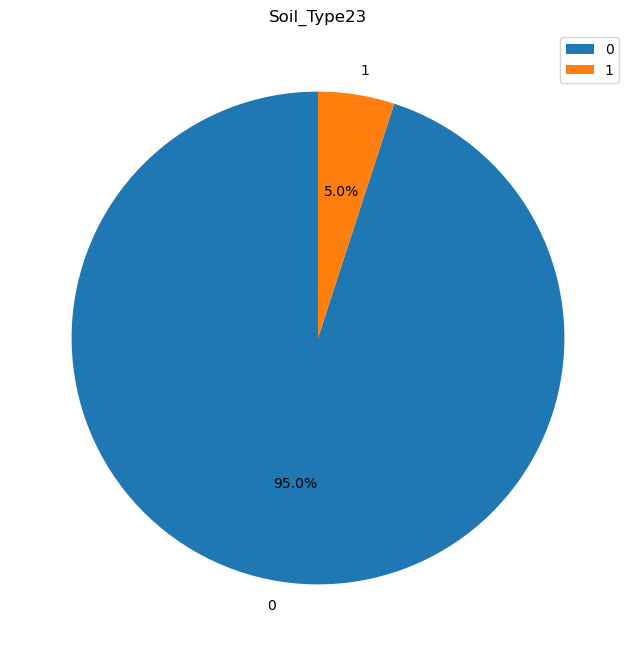

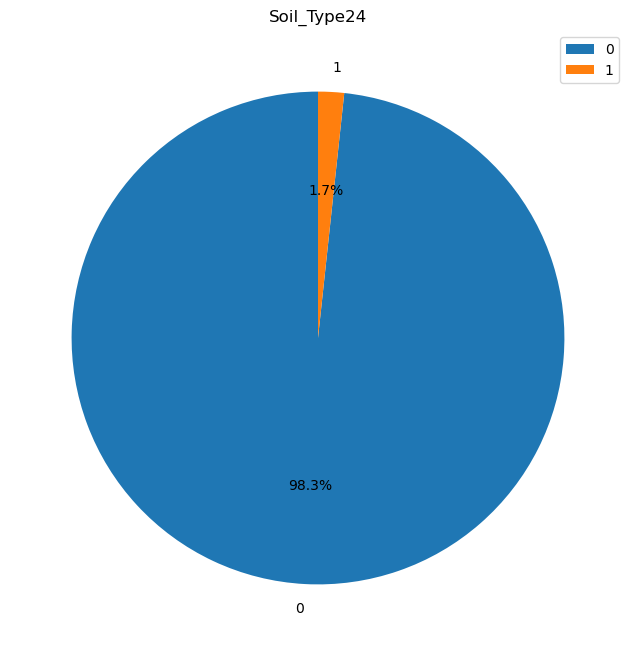

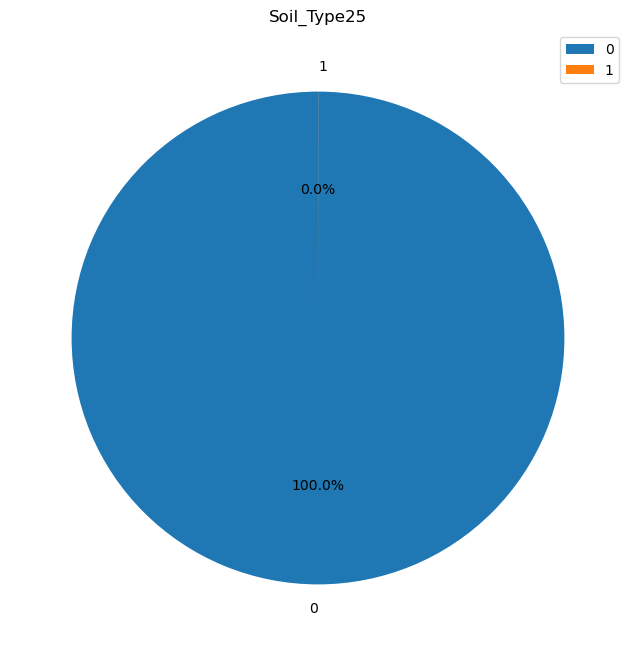

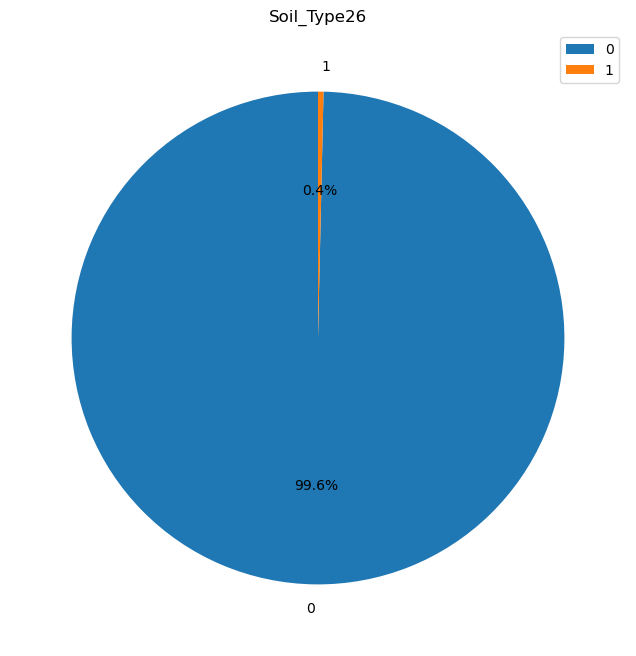

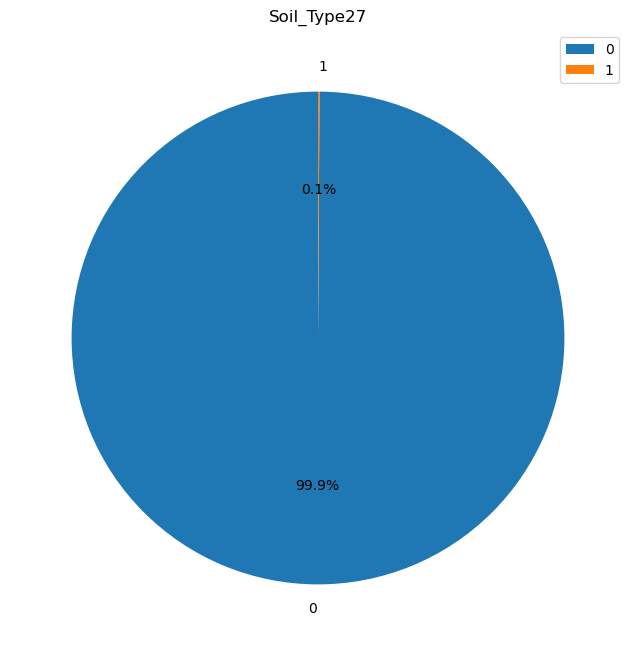

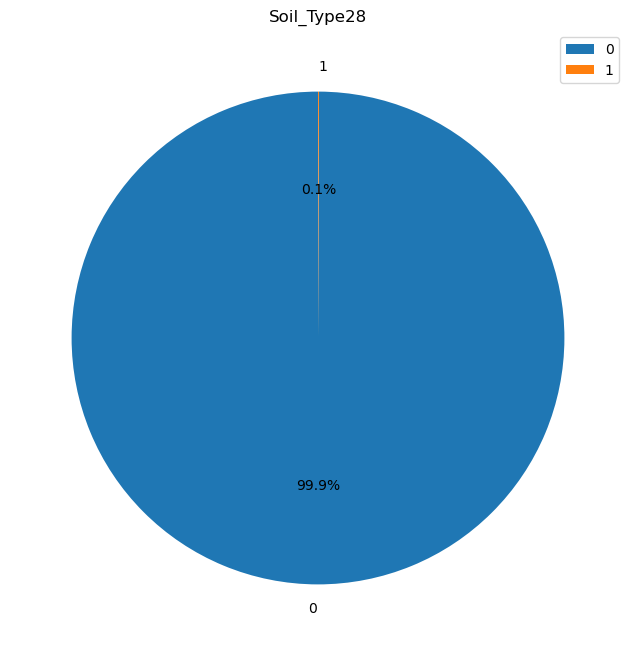

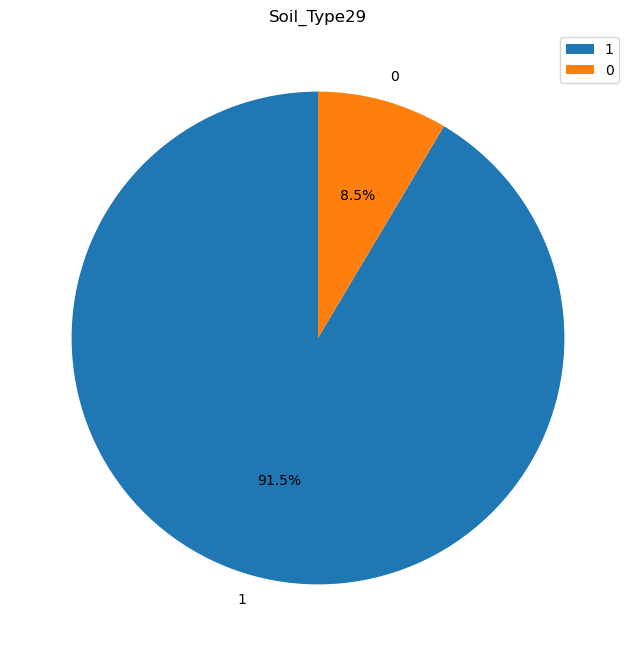

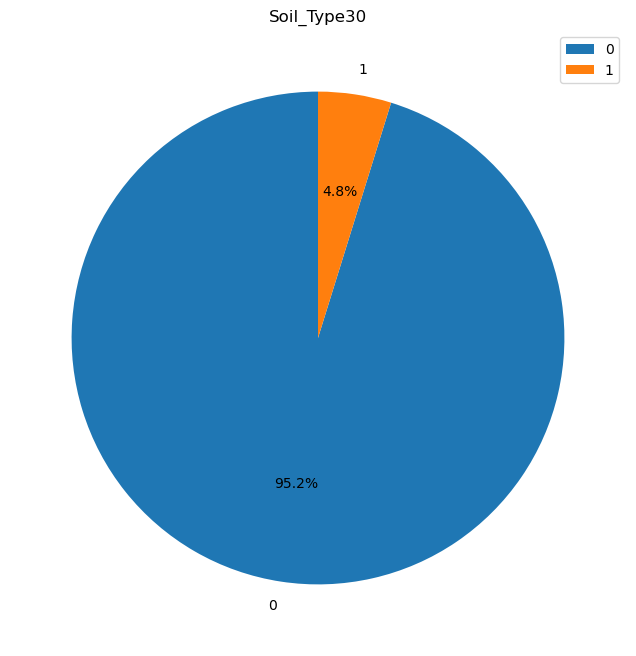

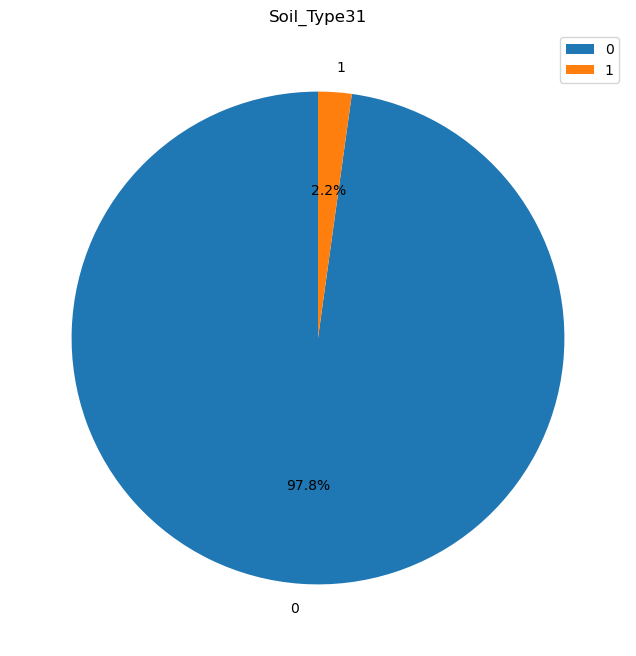

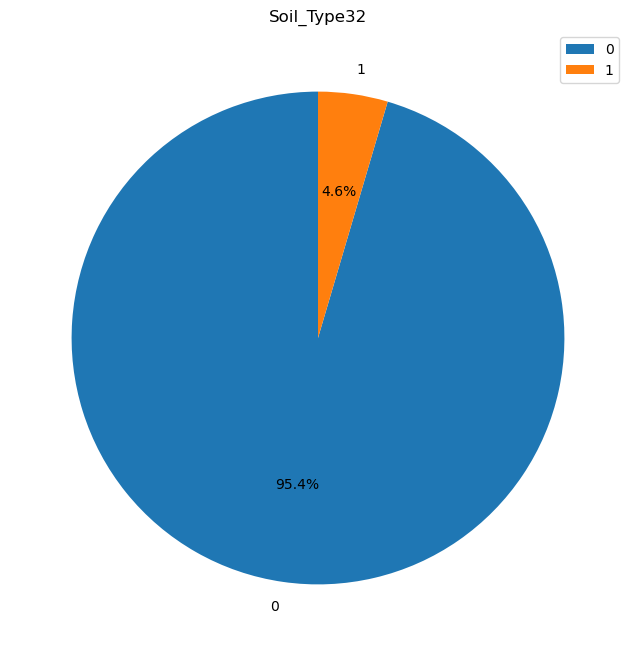

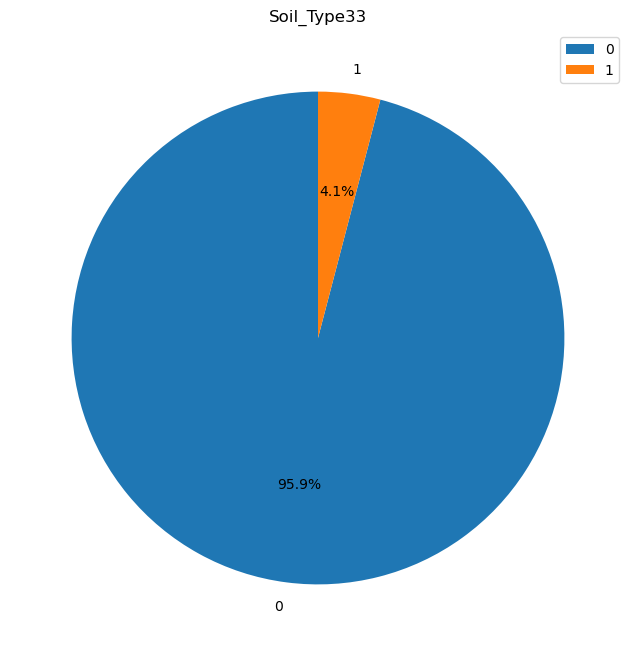

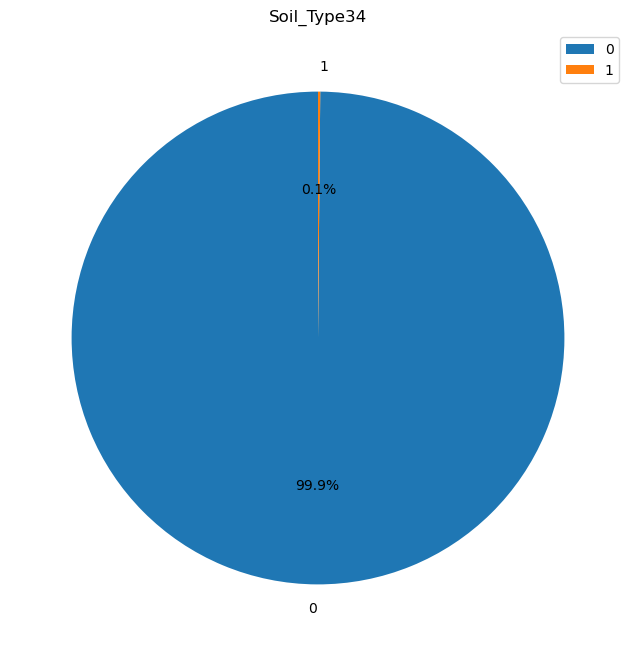

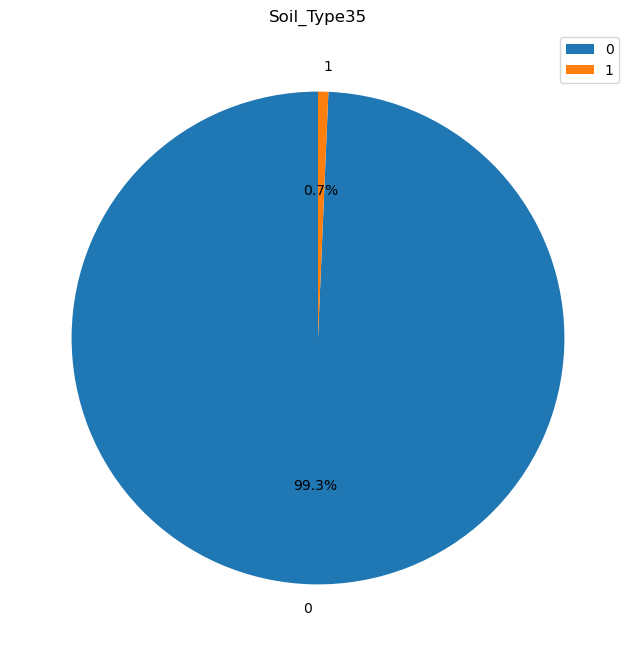

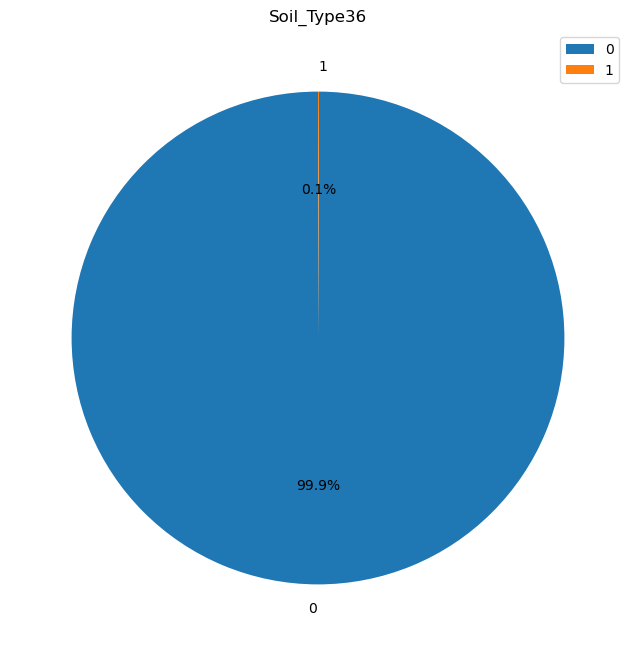

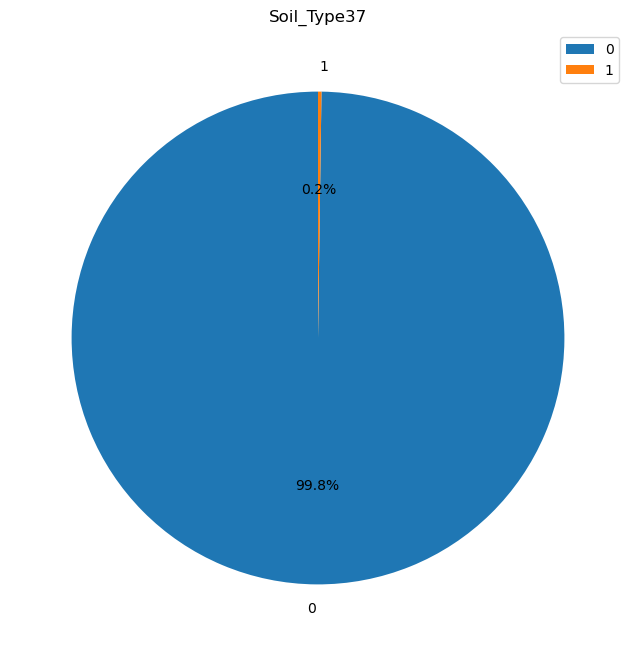

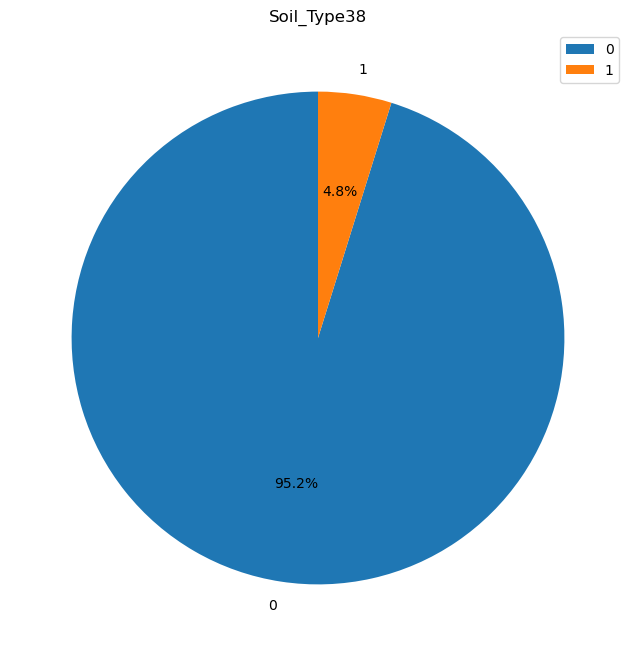

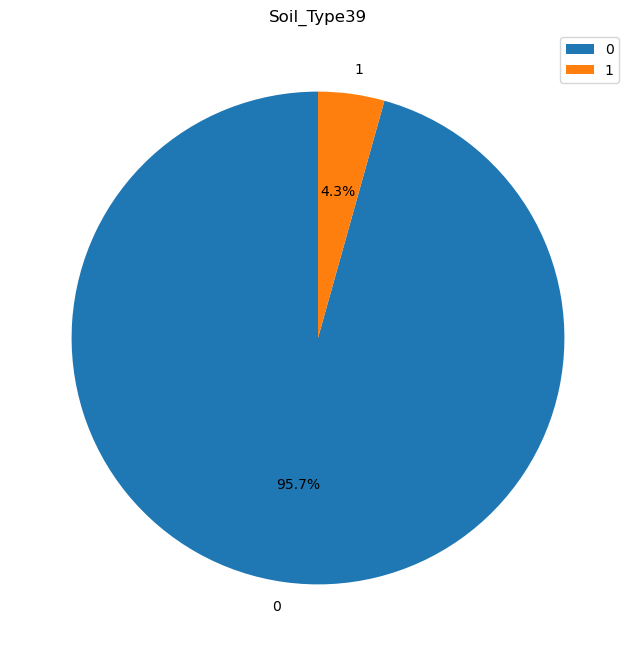

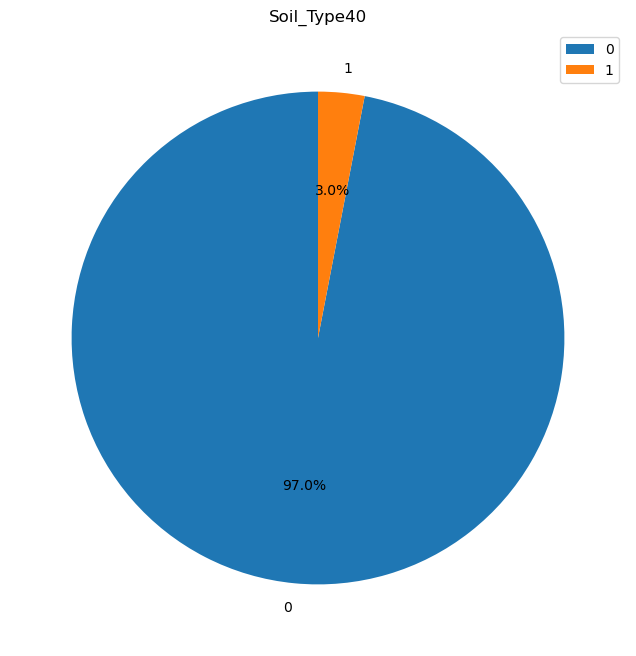

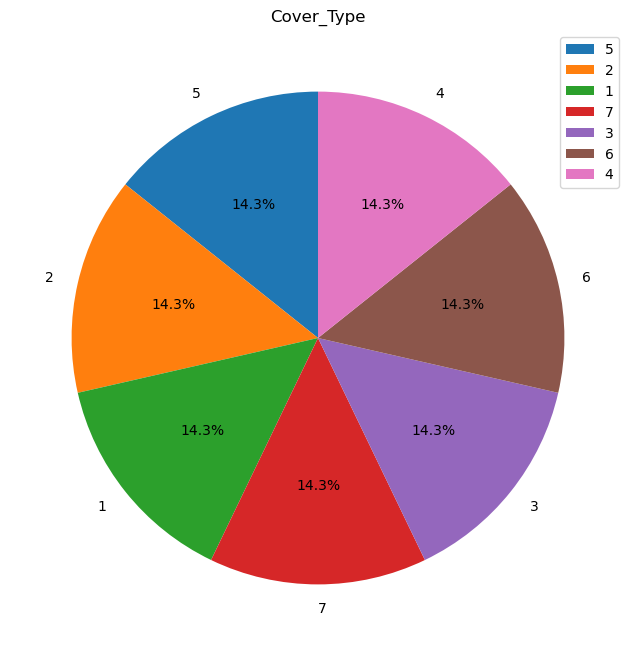

In [12]:
for i in df.columns:
    if df[i].dtype == object:
        plt.figure(figsize=(8, 8))
        plt.pie(df[i].value_counts(), labels=df[i].unique(), autopct='%1.1f%%', startangle=90)
        plt.title(i)
        plt.legend(df[i].unique(), loc='upper right')  # Adding legend
        plt.show()

# Bivariate Analysis

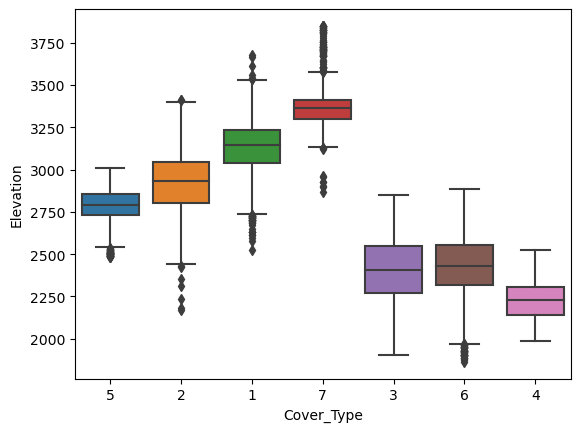

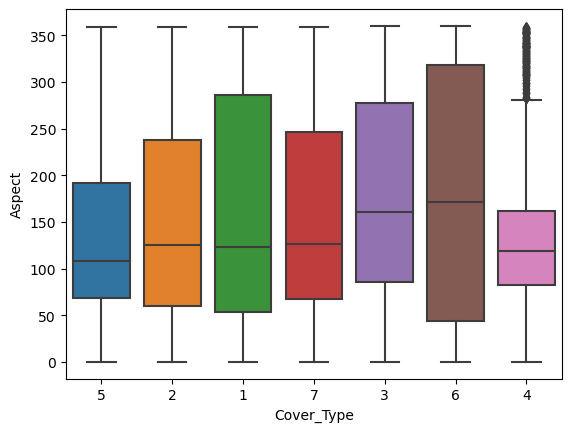

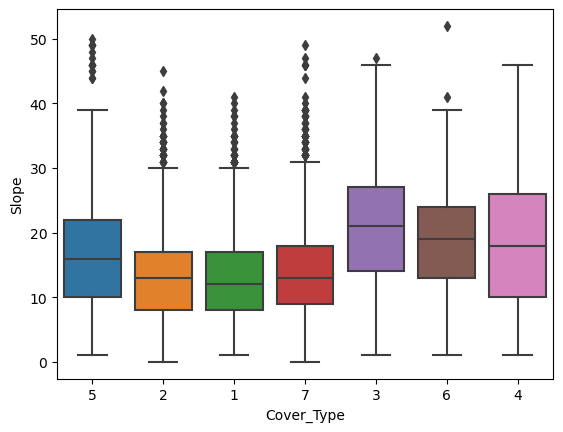

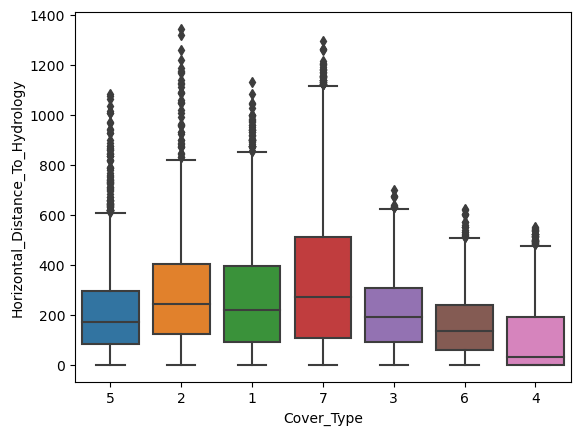

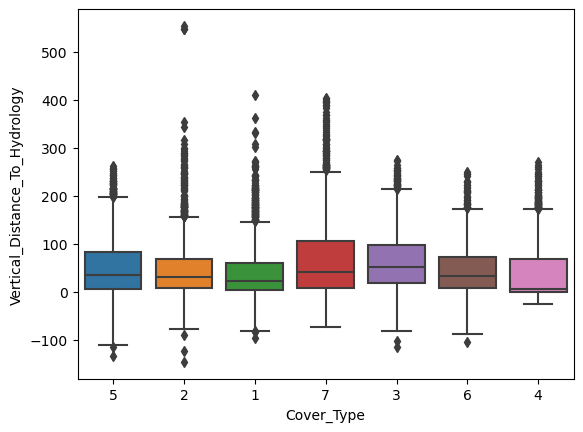

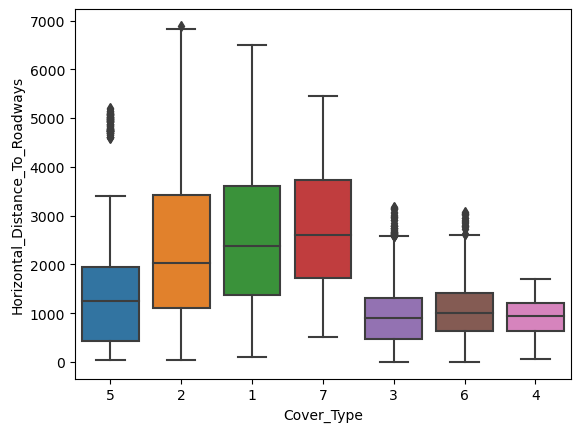

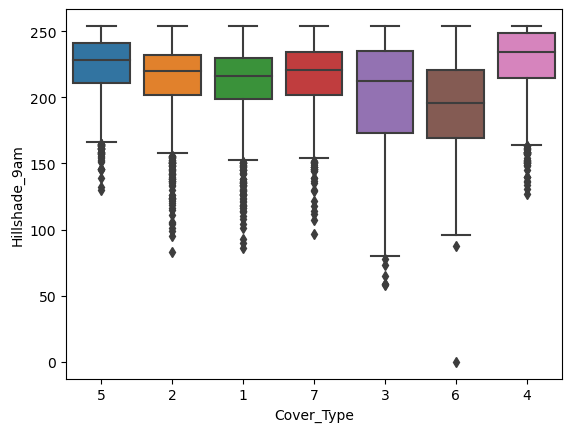

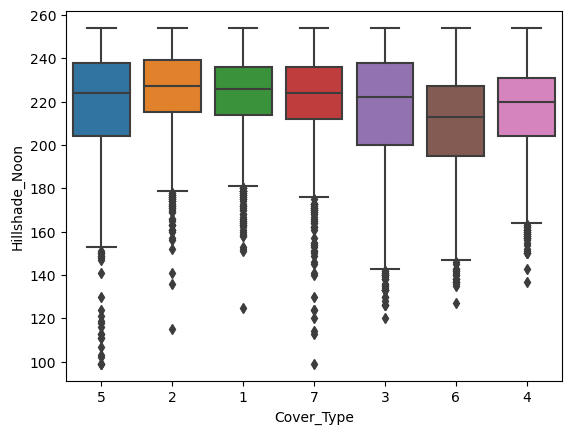

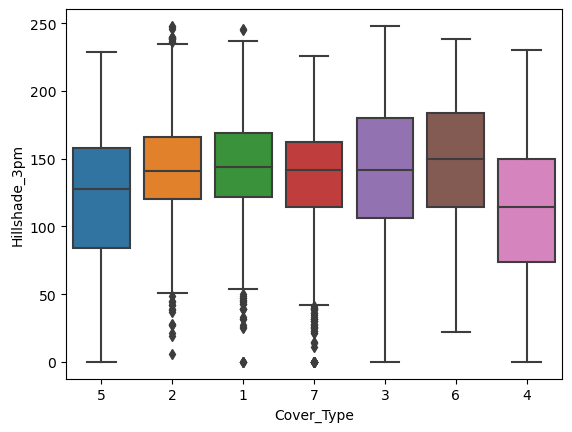

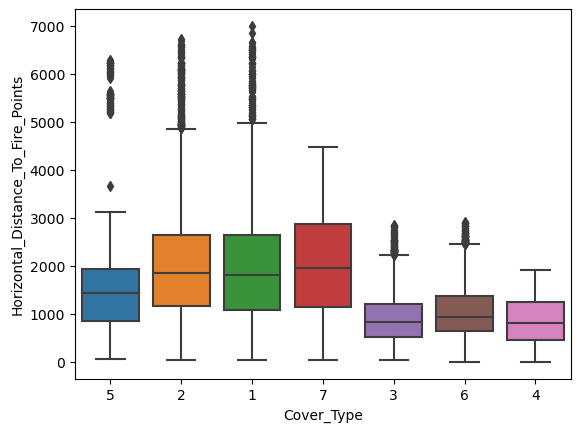

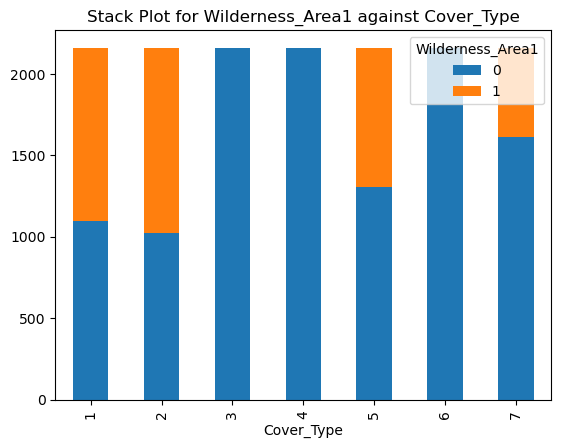

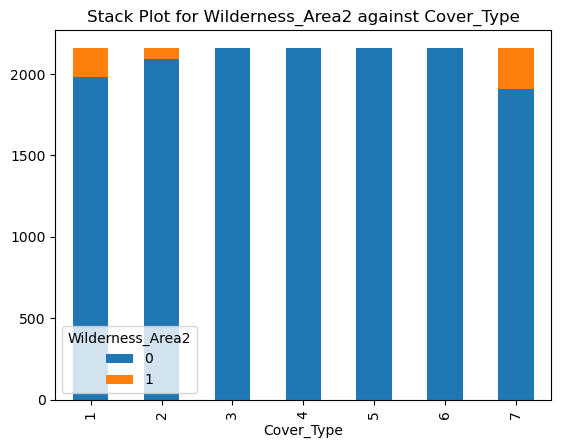

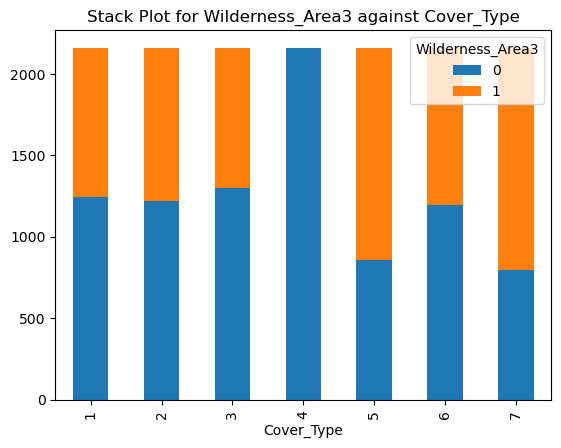

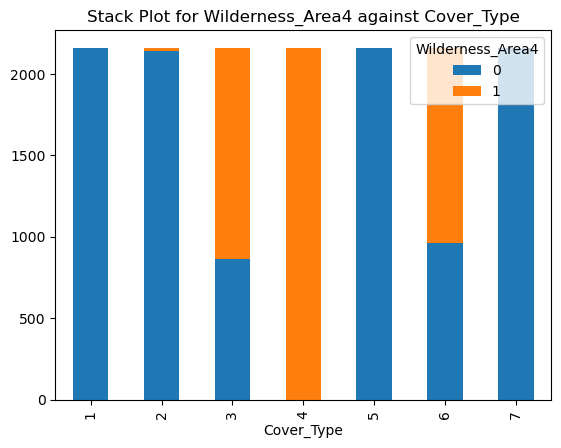

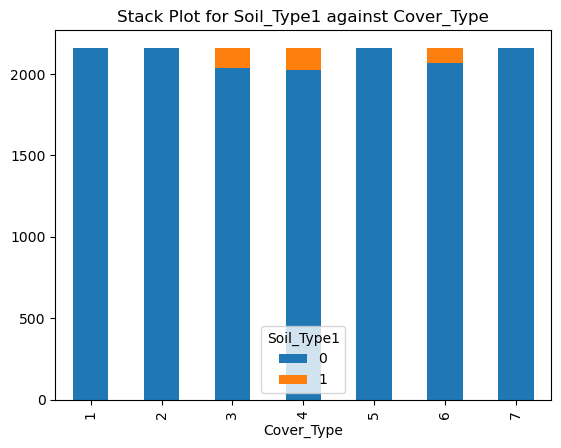

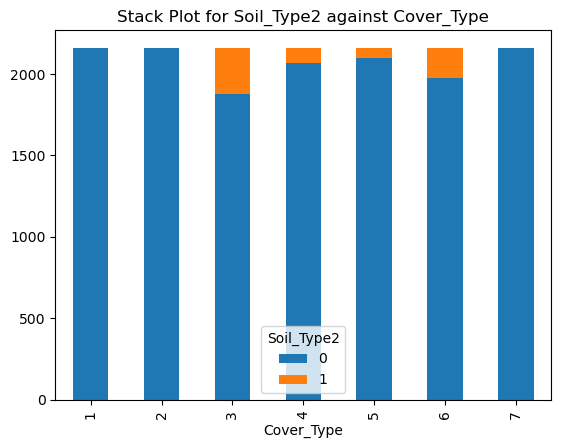

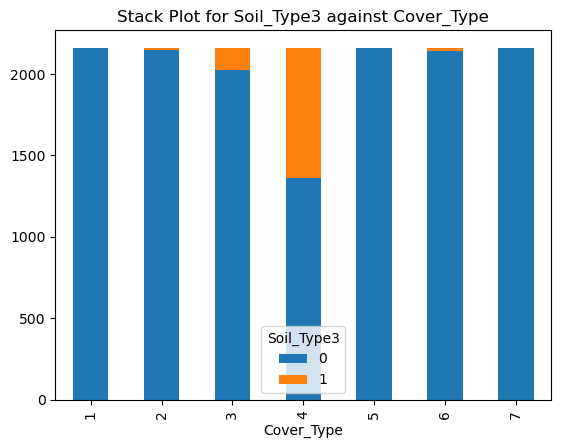

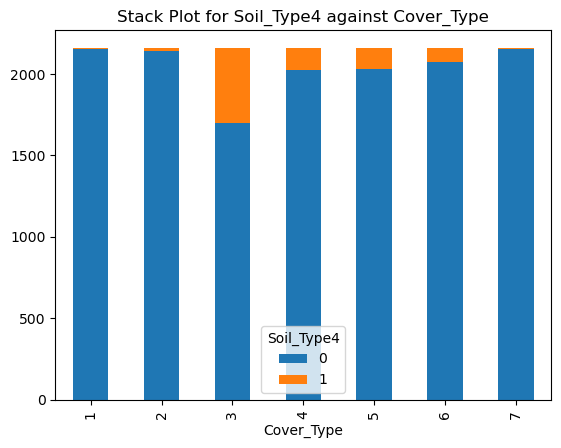

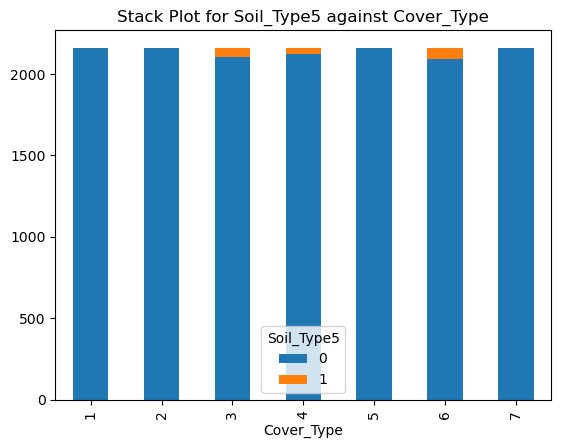

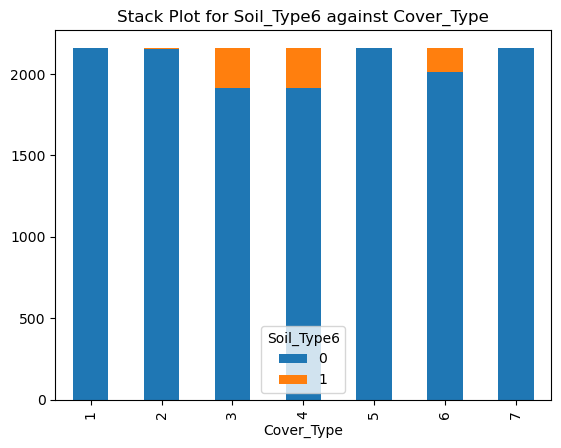

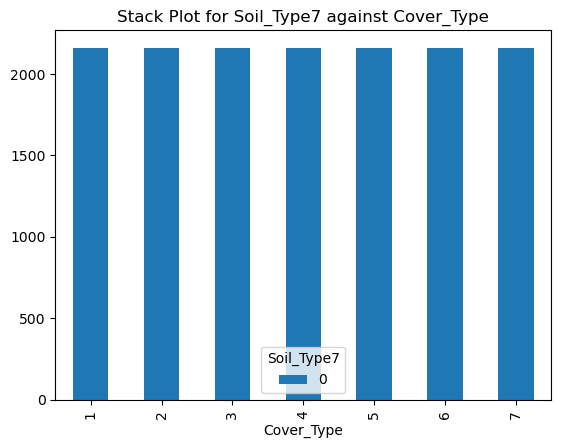

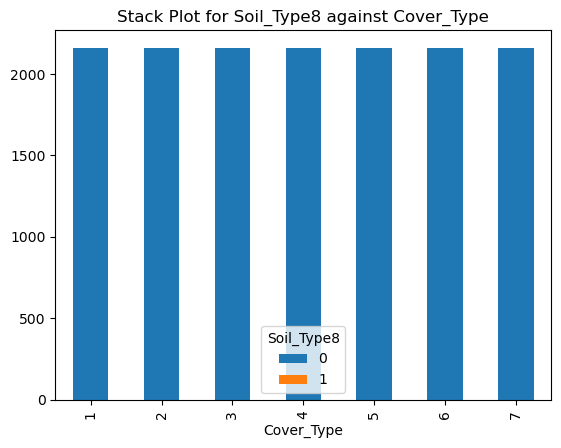

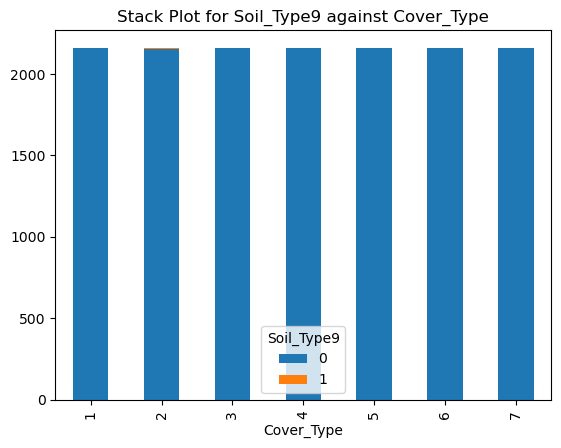

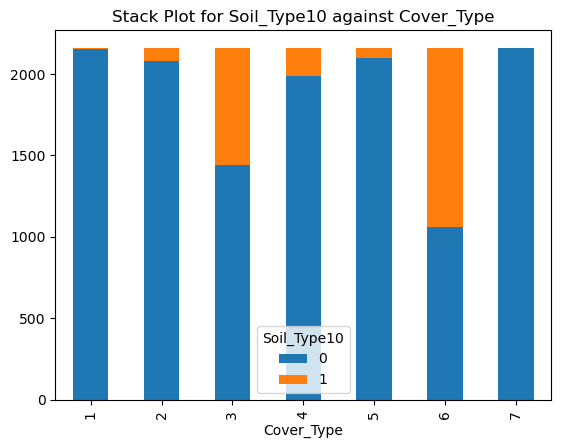

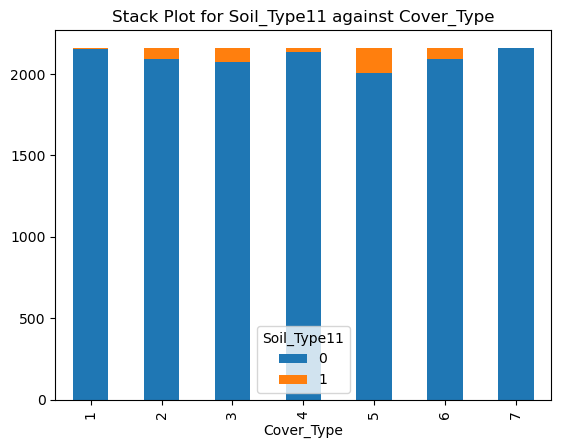

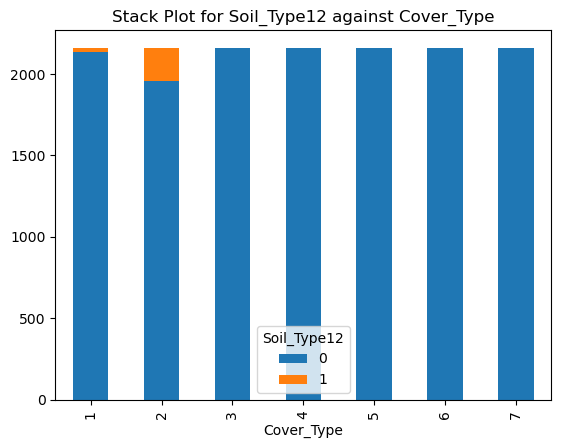

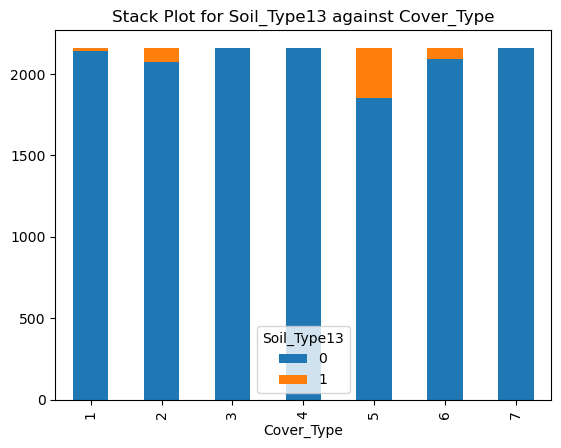

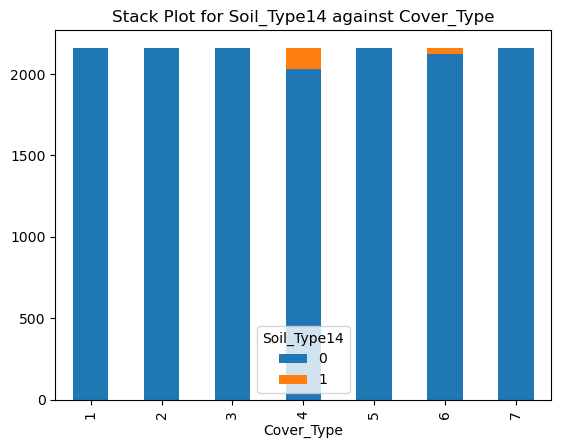

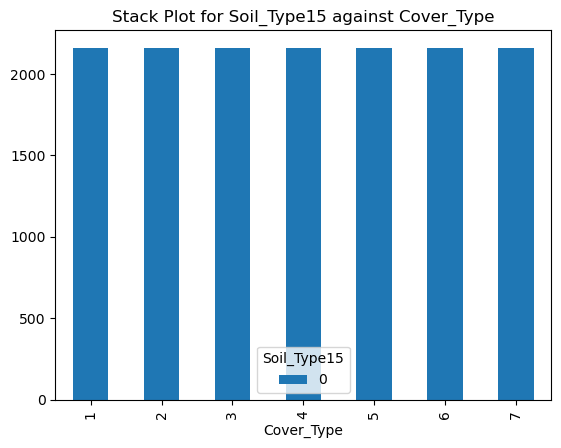

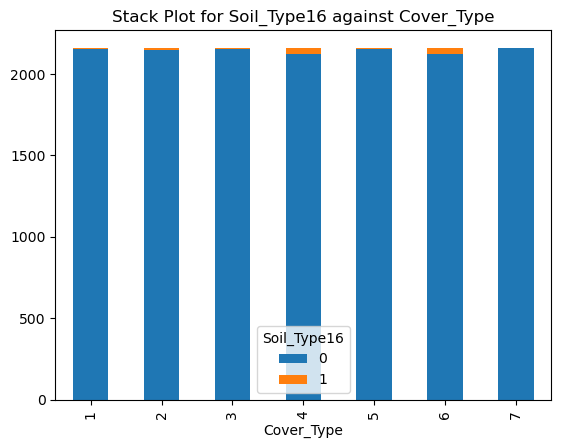

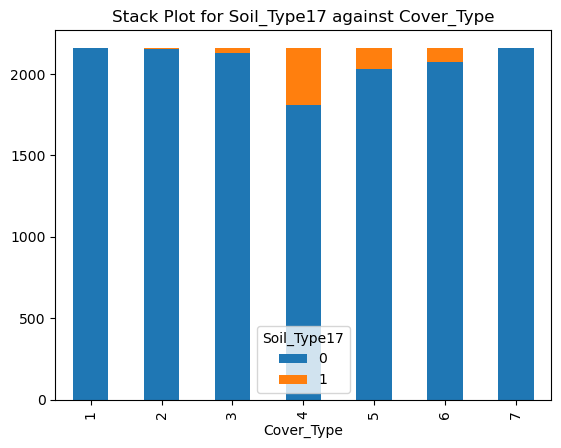

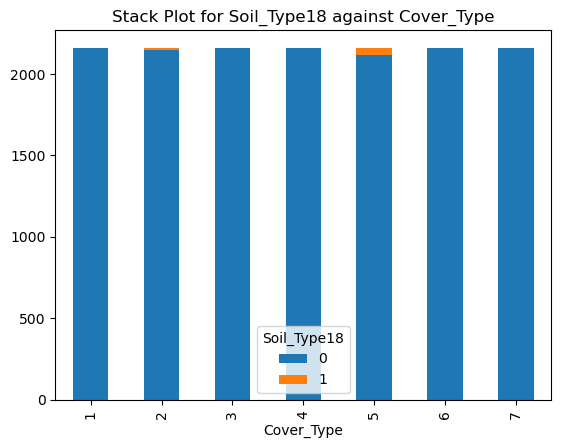

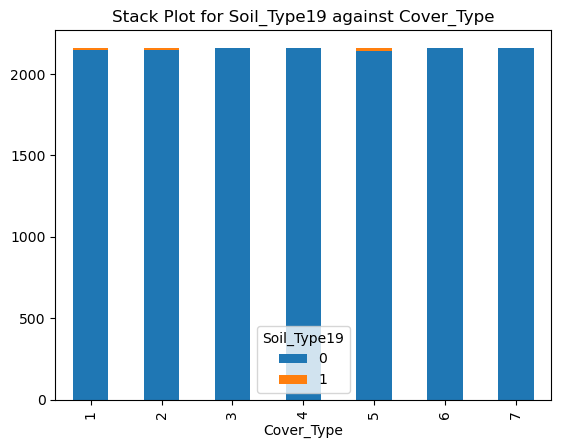

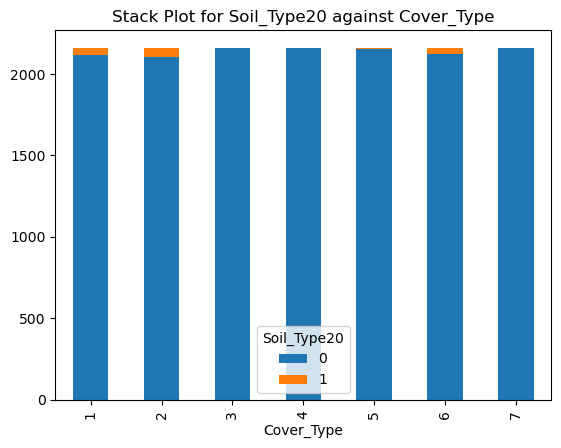

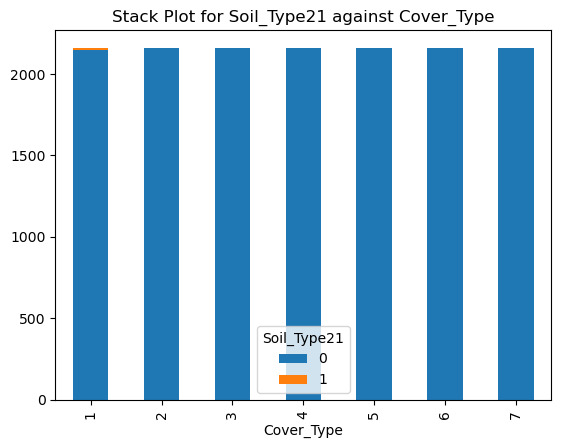

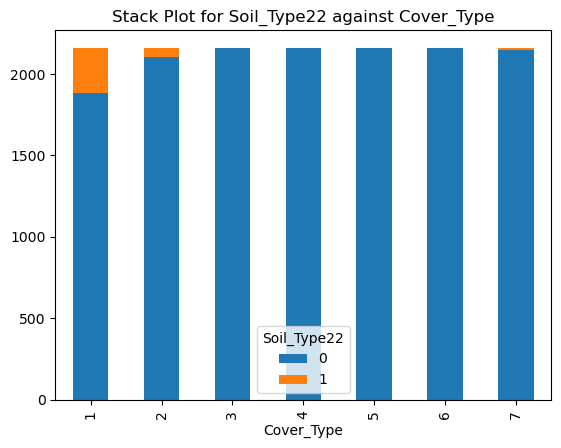

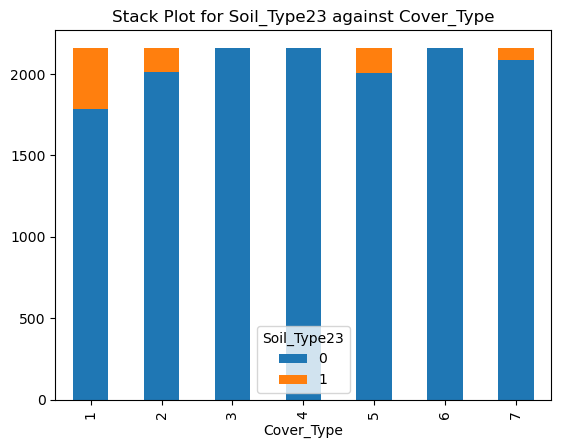

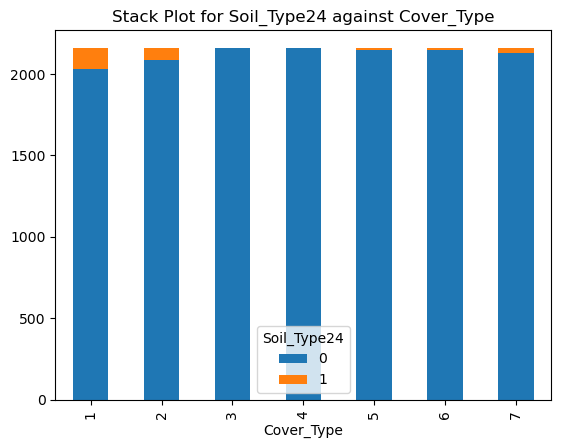

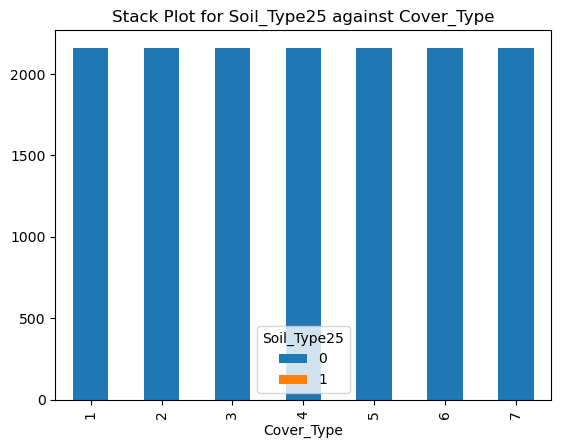

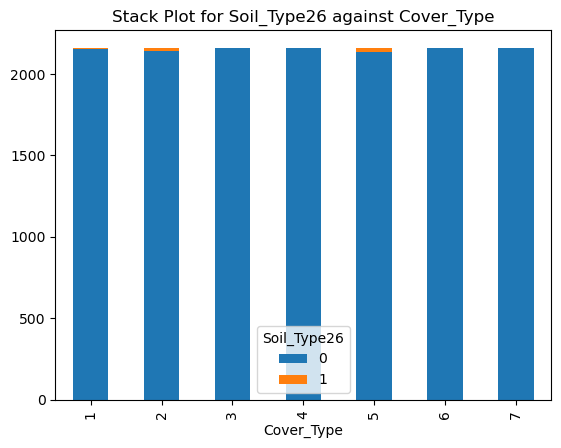

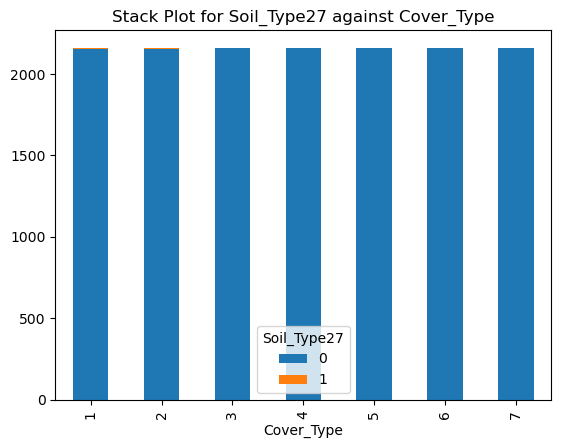

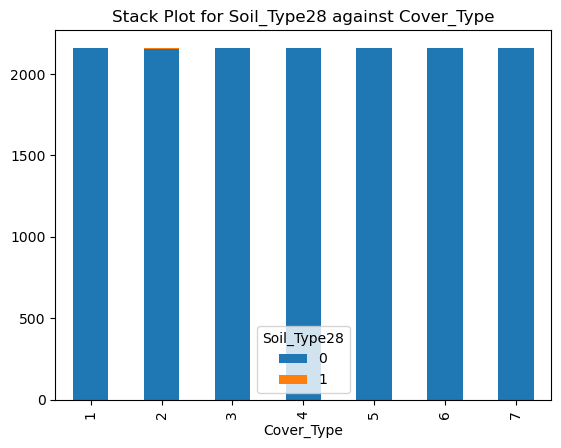

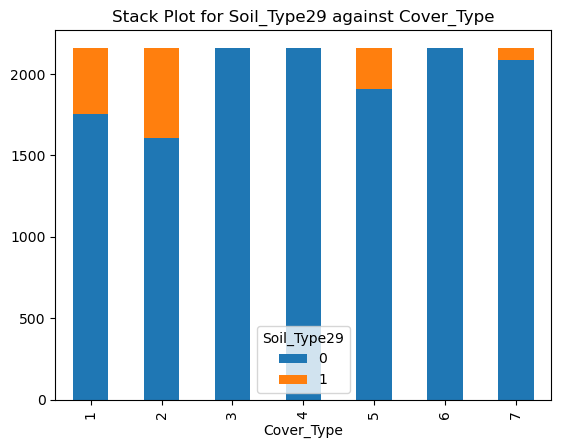

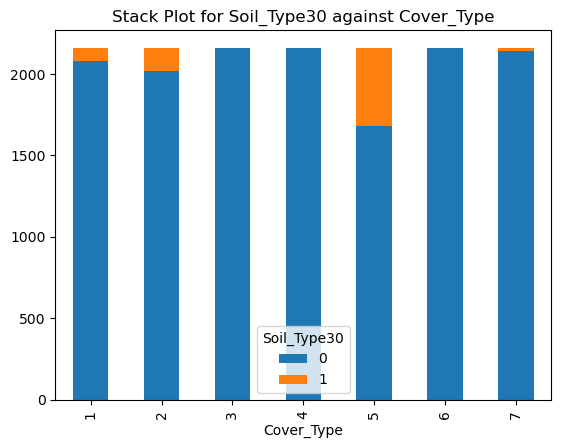

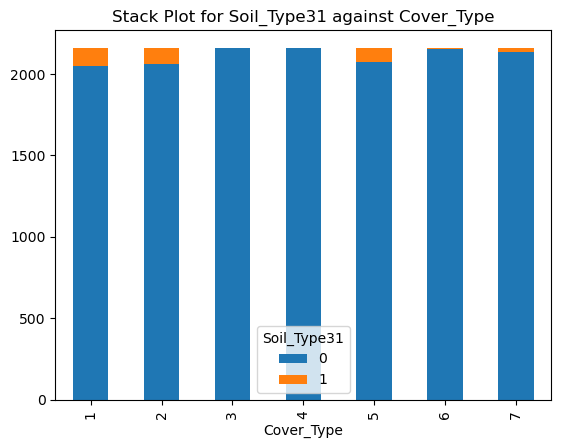

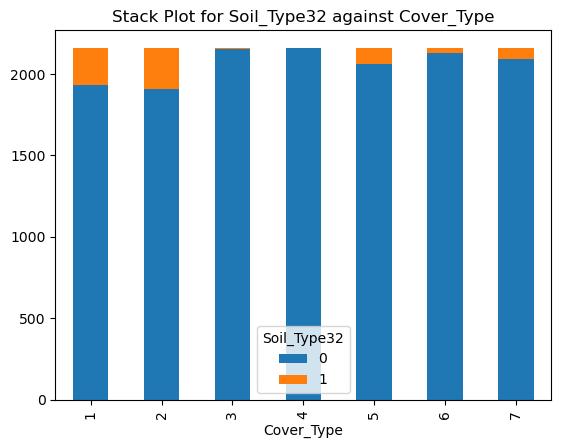

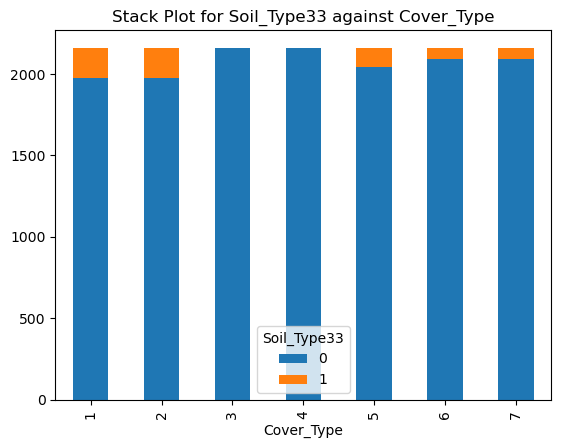

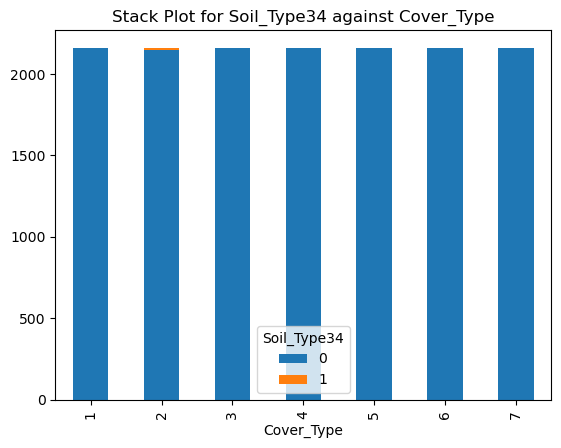

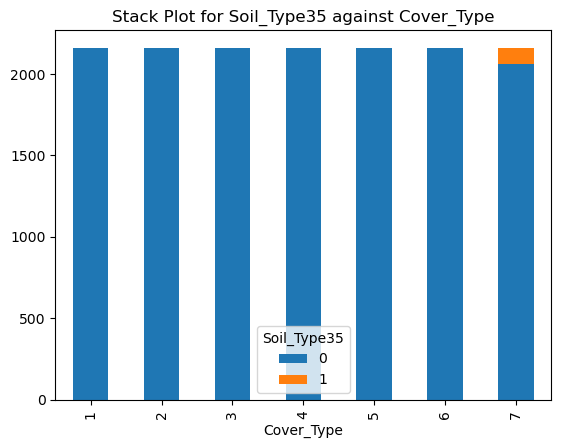

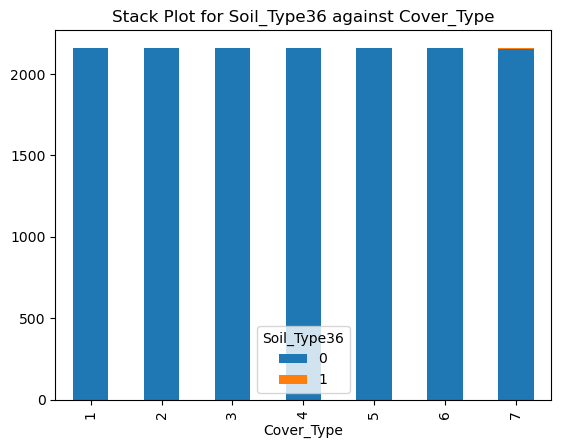

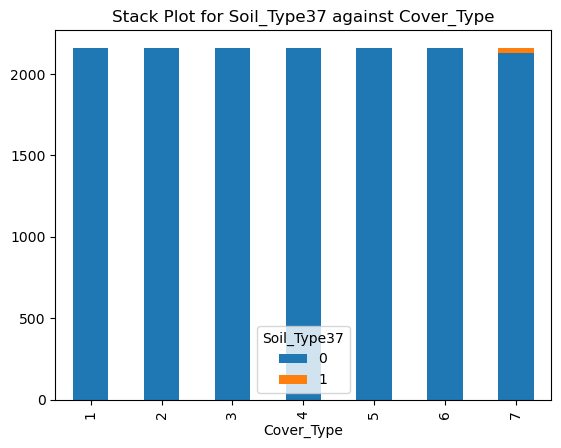

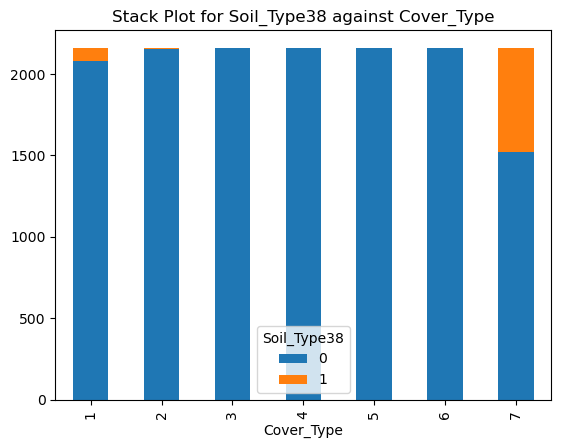

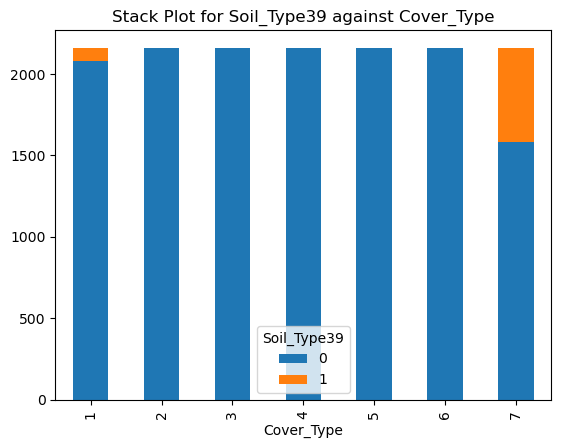

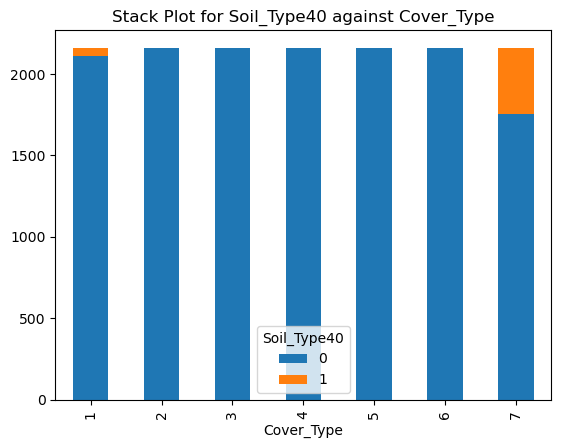

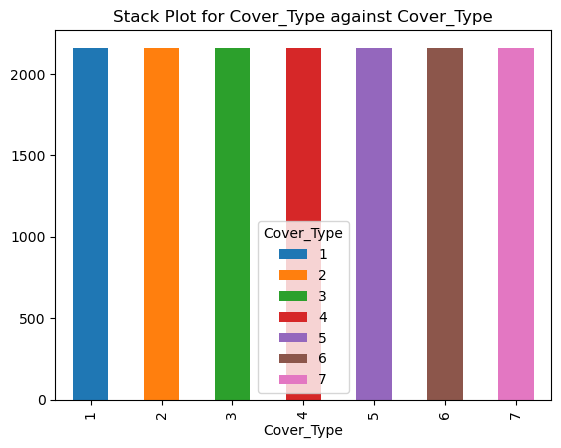

In [13]:
for i in df.columns:
    # Checking if the data type of the column is 'int64'
    if df[i].dtype == 'int64':
        # Creating a box plot for numerical columns
        sns.boxplot(x=df['Cover_Type'], y=df[i])
        # Displaying the box plot
        plt.show()
    else:
        # For non-numeric columns:

        # Grouping data by 'Cover_Type' and the current column, counting occurrences, and unstacking
        counts = df.groupby(['Cover_Type', i]).size().unstack()

        # Creating a stacked bar plot for each unique value against 'Cover_Type'
        counts.plot(kind='bar', stacked=True)

        # Setting the title for the plot indicating the non-numeric column against 'Cover_Type'
        plt.title(f'Stack Plot for {i} against Cover_Type')

        # Displaying the stacked bar plot
        plt.show()

### Outliers checking

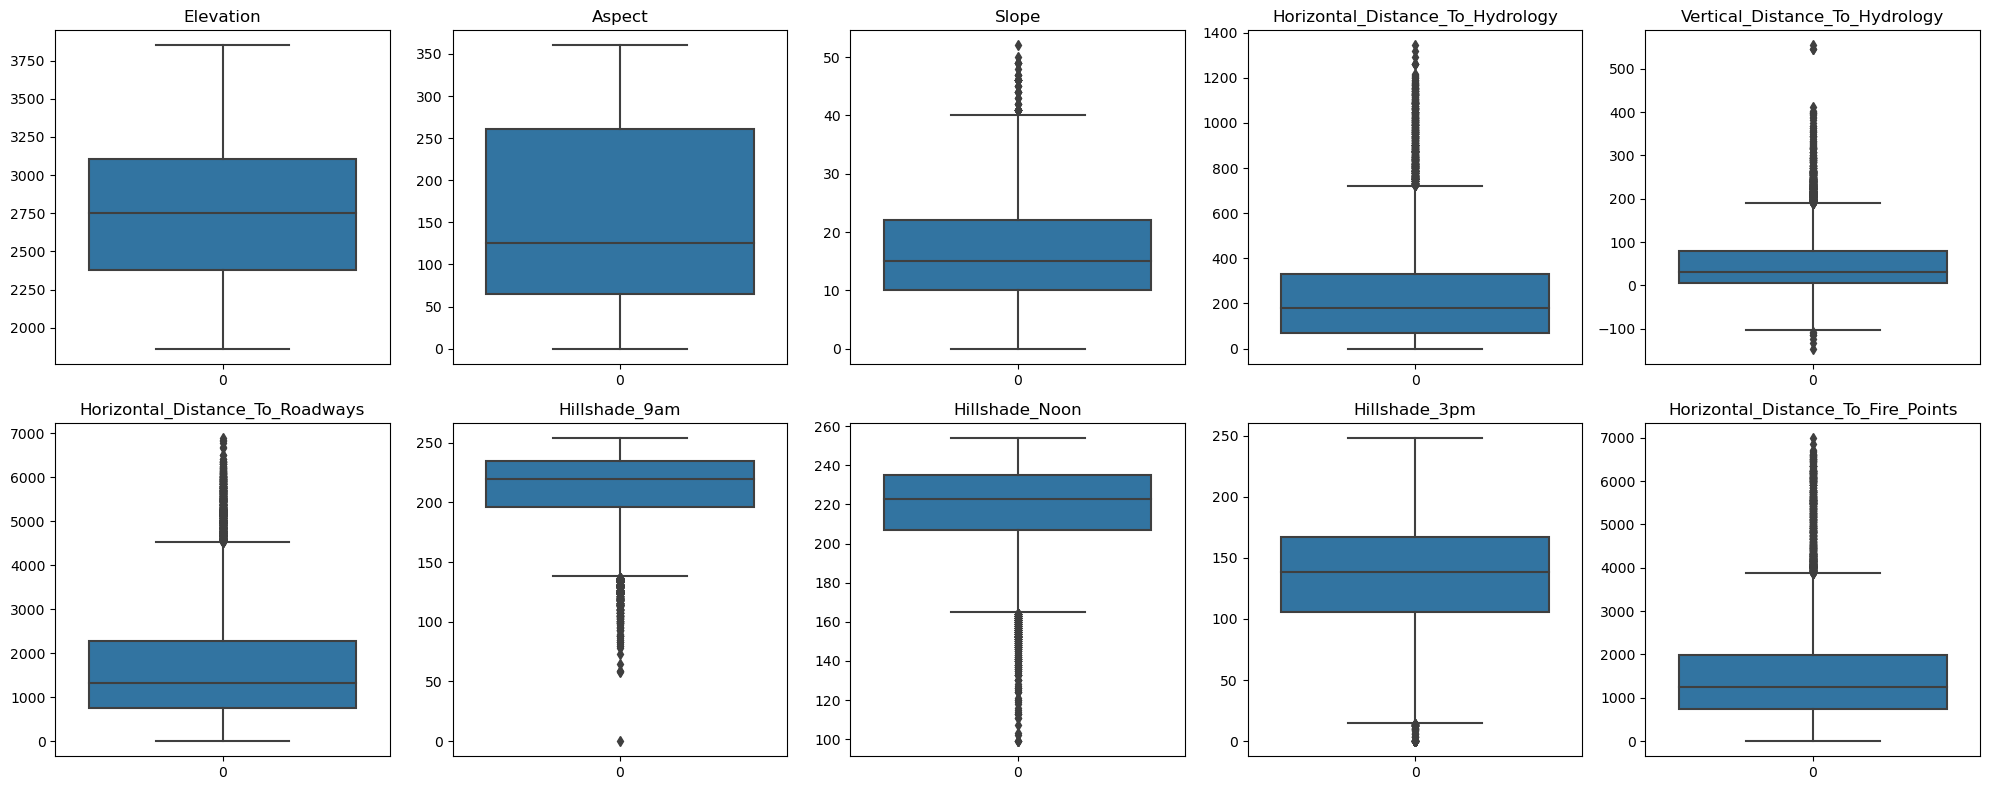

In [14]:
# Select columns with integer dtype
df_column = df.select_dtypes(include='int64')

# Set up the number of rows and columns in the subplot grid
num_cols = len(df_column.columns) // 2 + len(df_column.columns) % 2  # Adjust for odd number of variables
num_rows = 2

# Create subplots for each variable in 2 rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=( 4*num_cols,8))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Plot distplots for each variable
for i, column in enumerate(df_column.columns):
    sns.boxplot(df_column[column], ax=axes[i])
    axes[i].set_title(column)

# Remove empty subplots if the number of variables is odd
if len(df_column.columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Therefore we can see that the columns like Elevation,Aspect does not have any outliers so there is no need of outlier treatment

In [15]:
df_num =  df.select_dtypes(include = int)
df_num.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


In [16]:
for i in df_num.columns:
    mean = df_num[i].mean()
    median =  df_num[i].median()
    print(i)
    print('mean: ', mean)
    print('median: ',median)

Elevation
mean:  2749.3225529100528
median:  2752.0
Aspect
mean:  156.67665343915343
median:  126.0
Slope
mean:  16.501587301587303
median:  15.0
Horizontal_Distance_To_Hydrology
mean:  227.19570105820105
median:  180.0
Vertical_Distance_To_Hydrology
mean:  51.076521164021166
median:  32.0
Horizontal_Distance_To_Roadways
mean:  1714.0232142857142
median:  1316.0
Hillshade_9am
mean:  212.70429894179895
median:  220.0
Hillshade_Noon
mean:  218.96560846560845
median:  223.0
Hillshade_3pm
mean:  135.09199735449735
median:  138.0
Horizontal_Distance_To_Fire_Points
mean:  1511.1472883597883
median:  1256.0


From the above result we can see that mean median of the numeric variables  in which we dont need to treat the oultiers for the columns like Slope,hillshade_3pm,hillshade_noon,hillshade_9am

In [17]:
# Drop the 'Cover_Type' column from the DataFrame to create the feature set (x)
x = df.drop(columns='Cover_Type', axis=1)

# Extract the 'Cover_Type' column to create the target variable (y)
y = df[['Cover_Type']]

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2024)

# Print the shapes of the training and testing sets
print(xtrain.shape)  # Shape of the training features
print(xtest.shape)   # Shape of the testing features
print(ytrain.shape)  # Shape of the training target variable
print(ytest.shape)   # Shape of the testing target variable


(12096, 54)
(3024, 54)
(12096, 1)
(3024, 1)


### Model bulding  before  outliers  treatment 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

svm_pipeline = Pipeline([    ('classifier', SVC(random_state=42))
])

knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', rf_pipeline),
    ('Decision Tree', dt_pipeline),
    ('SVM', svm_pipeline),
    ('k-NN', knn_pipeline)
]

# Fit and evaluate each model
for name, pipeline in pipelines:
    pipeline.fit(xtrain, ytrain)
    y_pred = pipeline.predict(xtest)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(ytest, y_pred))
    print("Classification Report:")
    print(classification_report(ytest, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, y_pred))


Random Forest Results:
Accuracy: 0.8617724867724867
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.76      0.78       472
           2       0.77      0.70      0.73       416
           3       0.83      0.85      0.84       446
           4       0.93      0.98      0.96       414
           5       0.90      0.96      0.93       455
           6       0.85      0.85      0.85       401
           7       0.92      0.95      0.94       420

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024

Confusion Matrix:
[[357  75   2   0   8   0  30]
 [ 69 290  12   0  30  10   5]
 [  0   1 377  24   3  41   0]
 [  0   0   5 405   0   4   0]
 [  1   7   6   0 437   4   0]
 [  0   1  50   5   5 340   0]
 [ 16   4   0   0   0   0 400]]

Decision Tree Results:
Accuracy: 0.7926587301587301
Classification Report:
              p

In [19]:
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

svm_pipeline = Pipeline([    ('classifier', SVC(random_state=42))
])

knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', rf_pipeline),
    ('Decision Tree', dt_pipeline),
    ('SVM', svm_pipeline),
    ('k-NN', knn_pipeline)
]

# Fit and evaluate each model
for name, pipeline in pipelines:
    pipeline.fit(xtrain, ytrain)
    y_pred = pipeline.predict(xtrain)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(ytrain, y_pred))
    print("Classification Report:")
    print(classification_report(ytrain, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytrain, y_pred))


Random Forest Results:
Accuracy: 0.999917328042328
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1688
           2       1.00      1.00      1.00      1744
           3       1.00      1.00      1.00      1714
           4       1.00      1.00      1.00      1746
           5       1.00      1.00      1.00      1705
           6       1.00      1.00      1.00      1759
           7       1.00      1.00      1.00      1740

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Confusion Matrix:
[[1688    0    0    0    0    0    0]
 [   0 1743    0    0    1    0    0]
 [   0    0 1714    0    0    0    0]
 [   0    0    0 1746    0    0    0]
 [   0    0    0    0 1705    0    0]
 [   0    0    0    0    0 1759    0]
 [   0    0    0    0    0    0 1740]]

Decision Tree Results:
Accuracy: 1.0
Class

In [20]:
# Initialize the RobustScaler
robust_scaler = RobustScaler()
# Select numerical features for scaling
numerical_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                       'Horizontal_Distance_To_Fire_Points']

# Apply robust scaling to the numerical features for both training and testing sets
xtrain_num_scaled = pd.DataFrame(robust_scaler.fit_transform(xtrain[numerical_features]),
                                  columns=numerical_features)
xtest_num_scaled = pd.DataFrame(robust_scaler.transform(xtest[numerical_features]),
                                 columns=numerical_features)

# Select categorical features for both training and testing sets
xtrain_cat = xtrain.drop(columns=numerical_features, axis=1)
xtest_cat = xtest.drop(columns=numerical_features, axis=1)
xtrain_cat=xtrain_cat.reset_index()
xtest_cat=xtest_cat.reset_index()

In [21]:
# Concatenate the scaled numerical features and categorical features for the training set
Xtrain = pd.concat([xtrain_num_scaled, xtrain_cat], axis=1)

# Concatenate the scaled numerical features and categorical features for the testing set
Xtest = pd.concat([xtest_num_scaled, xtest_cat], axis=1)

# Display the first few rows of the concatenated training set
Xtrain.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.846785,-0.269036,-0.083333,-0.666667,-0.432432,-0.215477,0.384615,-0.321429,-0.508197,0.138397,...,0,0,0,0,0,0,0,0,0,0
1,-0.570451,-0.172589,-0.500000,-0.666667,-0.432432,-0.661107,0.358974,0.142857,-0.245902,0.011135,...,0,0,0,0,0,0,0,0,0,0
2,0.644323,-0.218274,-0.750000,2.007407,2.216216,0.897932,0.205128,0.285714,-0.032787,1.490555,...,1,0,0,0,0,0,0,0,0,0
3,0.830369,0.395939,0.750000,1.070370,1.594595,-0.348899,-0.487179,1.107143,0.606557,-0.325313,...,0,0,0,0,0,0,0,0,0,0
4,0.834473,-0.284264,-0.416667,1.948148,2.459459,0.182121,0.282051,-0.071429,-0.278689,0.147942,...,1,0,0,0,0,0,0,0,0,0


In [22]:
Xtrain.drop(columns="index",axis=1,inplace=True)
Xtest.drop(columns="index",axis=1,inplace=True)

In [23]:
df_col = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']

In [24]:
# Iterate through each column in the DataFrame
for i in df_col:
    # Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR)
    Q1 = Xtrain[i].quantile(0.25)
    Q3 = Xtrain[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    LL = Q1 - (1.5 * IQR)
    UL = Q3 + (1.5 * IQR)

    # Iterate through each value in the specified column
    for index, value in Xtrain[i].items():
        # Check if the value is an outlier and replace it with NaN if it is
        if value > UL or value < LL:
            Xtrain.at[index, i] = np.nan


In [25]:
Xtrain.isnull().sum().sum()

2023

In [26]:
for i in Xtrain.columns:
    if Xtrain[i].dtype==object:
        Xtrain[i]=Xtrain[i].astype(int)

In [27]:
knn_imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(Xtrain), columns=Xtrain.columns)

# Model Building

### Decision Tree Model

In [28]:
# Initiating the Decision Tree model
x = df_imputed
y = ytrain.astype(int)
DT = DecisionTreeClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

# Fitting the model with the training data
DT_model = DT.fit(xtrain, ytrain)

# Making predictions on the test set
scaled_DT_ypred = DT_model.predict(xtest)
#ytest = ytest.astype('str')
# Printing the classification report to evaluate model performance
print(classification_report(ytest, scaled_DT_ypred))
print(confusion_matrix(ytest, scaled_DT_ypred))
print('cohen_kappa_score :',cohen_kappa_score(ytest, scaled_DT_ypred))

              precision    recall  f1-score   support

           1       0.62      0.58      0.60       506
           2       0.58      0.58      0.58       523
           3       0.74      0.71      0.72       514
           4       0.91      0.93      0.92       524
           5       0.78      0.85      0.81       512
           6       0.76      0.74      0.75       528
           7       0.87      0.90      0.88       522

    accuracy                           0.76      3629
   macro avg       0.75      0.75      0.75      3629
weighted avg       0.75      0.76      0.75      3629

[[296 130   0   0  20   0  60]
 [118 303   9   0  71  11  11]
 [  2  14 363  26  15  94   0]
 [  0   0  24 488   0  12   0]
 [ 15  44  11   0 434   8   0]
 [  1  17  83  25  13 389   0]
 [ 42  11   0   0   1   0 468]]
cohen_kappa_score : 0.7145067899776624


In [29]:
DT_model = DT.fit(xtrain, ytrain)

# Making predictions on the test set
scaled_DT_ypred = DT_model.predict(xtrain)
#ytest = ytest.astype('str')
# Printing the classification report to evaluate model performance
print(classification_report(ytrain, scaled_DT_ypred))
print(confusion_matrix(ytrain, scaled_DT_ypred))
print('cohen_kappa_score :',cohen_kappa_score(ytrain, scaled_DT_ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1182
           2       1.00      1.00      1.00      1221
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1222
           5       1.00      1.00      1.00      1193
           6       1.00      1.00      1.00      1231
           7       1.00      1.00      1.00      1218

    accuracy                           1.00      8467
   macro avg       1.00      1.00      1.00      8467
weighted avg       1.00      1.00      1.00      8467

[[1182    0    0    0    0    0    0]
 [   0 1221    0    0    0    0    0]
 [   0    0 1200    0    0    0    0]
 [   0    0    0 1222    0    0    0]
 [   0    0    0    0 1193    0    0]
 [   0    0    0    0    0 1231    0]
 [   0    0    0    0    0    0 1218]]
cohen_kappa_score : 1.0


* The model exhibits varying levels of performance across different classes, with some classes having higher precision and recall than others.
* Classes 4, 5, and 7 demonstrate strong classification performance, while classes 1 and 2 show moderate performance.
* The overall model accuracy is decent, but it's important to consider class-specific metrics for a more nuanced evaluation.

### Random Forest Model

In [30]:
# Initiating the RandomForestClassifier model
RF = RandomForestClassifier()

# Fitting the model with the training data
RF_model = RF.fit(xtrain, ytrain)

# Making predictions on the test set
scaled_RF_ypred = RF_model.predict(xtest)

# Printing the classification report to evaluate model performance
print('classification_report:-',classification_report(ytest, scaled_RF_ypred))
print('confusion_matrix:-',confusion_matrix(ytest, scaled_RF_ypred))
print('cohen_kappa_score :',cohen_kappa_score(ytest, scaled_RF_ypred))

classification_report:-               precision    recall  f1-score   support

           1       0.76      0.73      0.74       506
           2       0.76      0.69      0.72       523
           3       0.81      0.76      0.78       514
           4       0.90      0.96      0.93       524
           5       0.89      0.92      0.90       512
           6       0.80      0.83      0.81       528
           7       0.92      0.97      0.95       522

    accuracy                           0.84      3629
   macro avg       0.83      0.84      0.83      3629
weighted avg       0.83      0.84      0.83      3629

confusion_matrix:- [[367  89   0   0  11   1  38]
 [ 98 361   7   0  39  12   6]
 [  0   7 391  30   8  78   0]
 [  0   0  10 503   0  11   0]
 [  1  15  14   0 473   9   0]
 [  0   3  62  24   3 436   0]
 [ 14   1   0   0   0   0 507]]
cohen_kappa_score : 0.8099869207251356


In [31]:
scaled_RF_ypred = RF_model.predict(xtrain)

# Printing the classification report to evaluate model performance
print(classification_report(ytrain, scaled_RF_ypred))
print(confusion_matrix(ytrain, scaled_RF_ypred))

print('cohen_kappa_score :',cohen_kappa_score(ytrain, scaled_RF_ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1182
           2       1.00      1.00      1.00      1221
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1222
           5       1.00      1.00      1.00      1193
           6       1.00      1.00      1.00      1231
           7       1.00      1.00      1.00      1218

    accuracy                           1.00      8467
   macro avg       1.00      1.00      1.00      8467
weighted avg       1.00      1.00      1.00      8467

[[1182    0    0    0    0    0    0]
 [   0 1221    0    0    0    0    0]
 [   0    0 1200    0    0    0    0]
 [   0    0    0 1222    0    0    0]
 [   0    0    0    0 1193    0    0]
 [   0    0    0    0    0 1231    0]
 [   0    0    0    0    0    0 1218]]
cohen_kappa_score : 1.0


* The model shows a strong ability to differentiate between the classes, with high precision, recall, and F1-scores for most classes.
* Classes 4, 5, and 7 have particularly high precision and recall, indicating that the model is very accurate in predicting these classes.
* The overall model performance, as indicated by the accuracy of 86% and average metrics, is quite good.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
# Define models and corresponding pipeline steps
models = [
    ('Multinomial Logistic Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs')),
    ('K-nearest Neighbors', KNeighborsClassifier()),
    ('Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Support Vector Machine', SVC())
]

# Build pipelines for each model with appropriate scalers
pipelines = []

for name, model in models:
    if name in ['Multinomial Logistic Regression', 'K-nearest Neighbors', 'Support Vector Machine']:
        pipeline = Pipeline([
            ('scaler',None), 
            (name, model)
        ])
    else:
        pipeline = Pipeline([
            (name, model)
        ])
    pipelines.append((name, pipeline))

# Train and evaluate each model in the pipeline
for name, pipeline in pipelines:
    print(f"Classifier: {name}")
    
    # Fit the pipeline on the training data
    pipeline.fit(xtrain, ytrain)

    # Make predictions on the test set
    y_pred = pipeline.predict(xtest)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(ytest, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, y_pred))
    print('cohen_kappa_score :',cohen_kappa_score(ytest, y_pred))
    print("\n")


Classifier: Multinomial Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.64      0.64       516
           2       0.58      0.53      0.56       516
           3       0.61      0.54      0.57       522
           4       0.80      0.87      0.83       509
           5       0.67      0.74      0.70       504
           6       0.60      0.62      0.61       542
           7       0.86      0.86      0.86       520

    accuracy                           0.68      3629
   macro avg       0.68      0.69      0.68      3629
weighted avg       0.68      0.68      0.68      3629

Confusion Matrix:
[[329 100   1   0  20   5  61]
 [103 273  12   0  91  28   9]
 [  0   6 282  57  35 142   0]
 [  0   0  38 441   0  30   0]
 [ 10  79  18   0 372  25   0]
 [  0   9 108  52  35 338   0]
 [ 70   0   0   0   2   0 448]]
cohen_kappa_score : 0.6315701117107355


Classifier: K-nearest Neighbors
Classification Report:
    

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
# Define models and corresponding pipeline steps
models = [
    ('Multinomial Logistic Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs')),
    ('K-nearest Neighbors', KNeighborsClassifier()),
    ('Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Support Vector Machine', SVC())
]

# Build pipelines for each model with appropriate scalers
pipelines = []

for name, model in models:
    if name in ['Multinomial Logistic Regression', 'K-nearest Neighbors', 'Support Vector Machine']:
        pipeline = Pipeline([
            ('scaler',None),  # Use StandardScaler for models that require standardization
            (name, model)
        ])
    else:
        pipeline = Pipeline([
            (name, model)
        ])
    pipelines.append((name, pipeline))

# Train and evaluate each model in the pipeline
for name, pipeline in pipelines:
    print(f"Classifier: {name}")
    
    # Fit the pipeline on the training data
    pipeline.fit(xtrain, ytrain)

    # Make predictions on the test set
    y_pred = pipeline.predict(xtrain)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(ytrain, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytrain, y_pred))
    print('cohen_kappa_score :',cohen_kappa_score(ytrain, y_pred))
    print("\n")


Classifier: Multinomial Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.68      0.67      1172
           2       0.63      0.54      0.59      1228
           3       0.62      0.53      0.57      1192
           4       0.80      0.88      0.84      1237
           5       0.72      0.77      0.74      1201
           6       0.60      0.64      0.62      1217
           7       0.89      0.88      0.89      1220

    accuracy                           0.71      8467
   macro avg       0.70      0.70      0.70      8467
weighted avg       0.70      0.71      0.70      8467

Confusion Matrix:
[[ 802  201    2    0   40    7  120]
 [ 273  669   14    1  219   39   13]
 [   0    5  634  163   46  344    0]
 [   0    0   79 1089    0   69    0]
 [  19  166   26    0  923   67    0]
 [   0   18  260  103   55  781    0]
 [ 141    0    1    0    3    0 1075]]
cohen_kappa_score : 0.6563311967201578


Classifier

The provided information describes the performance of the different machine learning models: Decision Tree, Random Forest, and k-Nearest Neighbors (KNN). 
Decision Tree (Accuracy: 76%): The Decision Tree model achieved an accuracy of 76%. 
Random Forest (Accuracy: 84%): The Random Forest model outperformed the Decision Tree, exhibiting a higher accuracy of 84%. Additionally, it showed consistent excellence across precision, recall, and F1-scores. This suggests that Random Forest provides a more robust and reliable prediction, making it a favorable choice compared to the Decision Tree.
we can  infer that the Random Forest model outperformed the Decision Tree and k-Nearest Neighbors models in terms of accuracy, precision, recall, and F1-scores. The Random Forest model achieved an accuracy of 84% and demonstrated consistent excellence across various performance metrics.

Therefore, from the models evaluated, the Random Forest appears to be a better choice for the specific task or application at hand.

## Power Transformer

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Define a list of classifiers
classifiers = [
    ('Multinomial Logistic Regression',LogisticRegression(multi_class='multinomial', solver='lbfgs')),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('K-nearest Neighbors', KNeighborsClassifier()),
    ('Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Decicion Tree ',DecisionTreeClassifier())
]

# Iterate through classifiers and build pipelines
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler',None),
        ('power_transformer', PowerTransformer()),
        ('classifier', classifier)
    ])

    # Train the model
    pipeline.fit(xtrain, ytrain)

    # Make predictions on the test set
    y_pred = pipeline.predict(xtest)

    # Print classification report and confusion matrix
    print(f"Classifier: {name}")
    print("Classification Report:")
    print(classification_report(ytest, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, y_pred))
    print('cohen_kappa_score :',cohen_kappa_score(ytest, y_pred))
    print("\n")


Classifier: Multinomial Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.64      0.65       516
           2       0.59      0.54      0.57       516
           3       0.61      0.54      0.57       522
           4       0.81      0.88      0.84       509
           5       0.68      0.76      0.72       504
           6       0.60      0.62      0.61       542
           7       0.87      0.91      0.89       520

    accuracy                           0.70      3629
   macro avg       0.69      0.70      0.69      3629
weighted avg       0.69      0.70      0.69      3629

Confusion Matrix:
[[328  98   0   0  21   3  66]
 [107 280   9   0  88  26   6]
 [  0   6 280  55  37 144   0]
 [  0   0  36 446   0  27   0]
 [  9  80  10   0 384  21   0]
 [  0   7 123  48  29 335   0]
 [ 45   0   0   0   2   0 473]]
cohen_kappa_score : 0.6454029085772945


Classifier: Random Forest
Classification Report:
          

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Define a list of classifiers
classifiers = [
    ('Multinomial Logistic Regression',LogisticRegression(multi_class='multinomial', solver='lbfgs')),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('K-nearest Neighbors', KNeighborsClassifier()),
    ('Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Decicion Tree ',DecisionTreeClassifier())
]

# Iterate through classifiers and build pipelines
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler',None),
        ('power_transformer', PowerTransformer()),
        ('classifier', classifier)
    ])

    # Train the model
    pipeline.fit(xtrain, ytrain)

    # Make predictions on the test set
    y_pred = pipeline.predict(xtrain)

    # Print classification report and confusion matrix
    print(f"Classifier: {name}")
    print("Classification Report:")
    print(classification_report(ytrain, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytrain, y_pred))
    print('cohen_kappa_score :',cohen_kappa_score(ytrain, y_pred))
    print("\n")


Classifier: Multinomial Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.68      0.67      1172
           2       0.64      0.55      0.59      1228
           3       0.62      0.55      0.58      1192
           4       0.81      0.89      0.85      1237
           5       0.73      0.78      0.75      1201
           6       0.61      0.64      0.63      1217
           7       0.89      0.90      0.89      1220

    accuracy                           0.71      8467
   macro avg       0.71      0.71      0.71      8467
weighted avg       0.71      0.71      0.71      8467

Confusion Matrix:
[[ 801  205    0    0   38    5  123]
 [ 271  678   15    1  213   38   12]
 [   0    5  650  153   52  332    0]
 [   0    0   79 1101    0   57    0]
 [  19  158   23    0  935   66    0]
 [   0   11  281   98   43  784    0]
 [ 121    2    0    0    4    0 1093]]
cohen_kappa_score : 0.6658379100399243


Classifier

## Hyperparameter Tuning

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# Define your data (xtrain, ytrain, xtest, ytest)

# Define a list of classifiers with their respective hyperparameter grids
classifiers = [
    ('Random Forest', RandomForestClassifier(),
     {'classifier__n_estimators': [50, 100, 200],
      'classifier__max_depth': [5, 10, 20],
      'classifier__min_samples_split': [2, 5, 10],
      'classifier__min_samples_leaf': [1, 2, 4],
      'classifier__max_features': ['auto', 'sqrt', 'log2']}),

    ('SVM', SVC(),
     {'classifier__C': [0.1, 1, 10],
      'classifier__kernel': ['linear', 'rbf'],
      'classifier__gamma': ['scale', 'auto']}),

    ('K-nearest Neighbors', KNeighborsClassifier(),
     {'classifier__n_neighbors': [3, 5, 7],
      'classifier__weights': ['uniform', 'distance'],
      'classifier__p': [1, 2]}),

    ('Discriminant Analysis', LinearDiscriminantAnalysis(),
     {'classifier__solver': ['svd', 'lsqr', 'eigen'],
      'classifier__shrinkage': [None, 'auto', 0.1]}),

    ('Decision Tree', DecisionTreeClassifier(),
     {'classifier__max_depth': [5, 10, 20],
      'classifier__min_samples_split': [2, 5, 10],
      'classifier__min_samples_leaf': [1, 2, 4],
      'classifier__max_features': ['auto', 'sqrt', 'log2']})
]

from sklearn.model_selection import RandomizedSearchCV

# ... (previous code)

# Iterate through classifiers and perform hyperparameter tuning using RandomizedSearchCV
for name, classifier, param_dist in classifiers:
    pipeline = Pipeline([
        ('scaler', None),
        ('power_transformer', PowerTransformer()),
        ('classifier', classifier)
    ])

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
    random_search.fit(xtrain, ytrain)

    # Get the best estimator and make predictions on the test set
    best_estimator = random_search.best_estimator_
    y_pred = best_estimator.predict(xtest)

    # Print classification report and confusion matrix
    print(f"Classifier: {name}")
    print("Best Hyperparameters:", random_search.best_params_)
    print("Classification Report:")
    print(classification_report(ytest, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(ytest, y_pred))

    print("\n")


Classifier: Random Forest
Best Hyperparameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20}
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.69      0.71       516
           2       0.72      0.65      0.68       516
           3       0.82      0.76      0.79       522
           4       0.92      0.97      0.94       509
           5       0.86      0.90      0.88       504
           6       0.79      0.85      0.82       542
           7       0.90      0.96      0.93       520

    accuracy                           0.83      3629
   macro avg       0.82      0.83      0.82      3629
weighted avg       0.82      0.83      0.82      3629

Confusion Matrix:
[[354  93   0   0  16   3  50]
 [100 335  13   0  41  22   5]
 [  0   3 398  26  12  83   0]
 [  0   0   8 494   0   7   0]
 [  5  32   9   0 45

### Training 

In [37]:
# Define a list of classifiers with their respective hyperparameter grids

classifiers = [
    ('Random Forest', RandomForestClassifier(),
     {'classifier__n_estimators': [50, 100, 200],
      'classifier__max_depth': [5, 10, 20],
      'classifier__min_samples_split': [2, 5, 10],
      'classifier__min_samples_leaf': [1, 2, 4],
      'classifier__max_features': ['auto', 'sqrt', 'log2']}),

    ('SVM', SVC(),
     {'classifier__C': [0.1, 1, 10],
      'classifier__kernel': ['linear', 'rbf'],
      'classifier__gamma': ['scale', 'auto']}),

    ('K-nearest Neighbors', KNeighborsClassifier(),
     {'classifier__n_neighbors': [3, 5, 7],
      'classifier__weights': ['uniform', 'distance'],
      'classifier__p': [1, 2]}),

    ('Discriminant Analysis', LinearDiscriminantAnalysis(),
     {'classifier__solver': ['svd', 'lsqr', 'eigen'],
      'classifier__shrinkage': [None, 'auto', 0.1]}),

    ('Decision Tree', DecisionTreeClassifier(),
     {'classifier__max_depth': [5, 10, 20],
      'classifier__min_samples_split': [2, 5, 10],
      'classifier__min_samples_leaf': [1, 2, 4],
      'classifier__max_features': ['auto', 'sqrt', 'log2']})
]

from sklearn.model_selection import RandomizedSearchCV

# Iterate through classifiers and perform hyperparameter tuning using RandomizedSearchCV
for name, classifier, param_dist in classifiers:
    pipeline = Pipeline([
        ('scaler', None),
        ('power_transformer', PowerTransformer()),
        ('classifier', classifier)
    ])

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
    random_search.fit(xtrain, ytrain)

    # Get the best estimator and make predictions on the test set
    best_estimator = random_search.best_estimator_
    y_pred = best_estimator.predict(xtrain)

    # Print classification report and confusion matrix
    print(f"Classifier: {name}")
    print("Best Hyperparameters:", random_search.best_params_)
    print("Classification Report:")
    print(classification_report(ytrain, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(ytrain, y_pred))
    print('cohen_kappa_score :',cohen_kappa_score(ytrain, y_pred))

    print("\n")

Classifier: Random Forest
Best Hyperparameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 20}
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.92      0.94      1172
           2       0.94      0.90      0.92      1228
           3       0.97      0.95      0.96      1192
           4       0.97      1.00      0.98      1237
           5       0.95      0.98      0.96      1201
           6       0.96      0.97      0.96      1217
           7       0.98      1.00      0.99      1220

    accuracy                           0.96      8467
   macro avg       0.96      0.96      0.96      8467
weighted avg       0.96      0.96      0.96      8467

Confusion Matrix:
[[1084   46    0    0   16    2   24]
 [  49 1109    9    0   41   16    4]
 [   0    2 1134   21    3   32    0]
 [   0    0    4 1232    0    1

Even after employing pruning techniques to mitigate overfitting by reducing leaf nodes and their depth, the model's performance on the testing set remains at 81%, compared to a high training set accuracy of 98%. Despite the effort to optimize through pruning, the marginal improvement suggests challenges in achieving a better balance between model complexity and generalization. Consequently, these results lead us to designate this model, post-pruning, as our final iteration. Ongoing monitoring and potential exploration of alternative approaches may be warranted to further enhance its stability and overall performance.

## Boosting 

In [38]:
!pip install lightgbm

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Assuming you have loaded your data and split it into features (x) and target (y)
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

# Define the best hyperparameters obtained from the hyperparameter tuning
best_hyperparameters = {
    'AdaBoost': {'n_estimators': 50},# this  hyperparameter  is taken    from decision tree  base model
    'GradientBoost': {'n_estimators': 100, 'learning_rate': 1.0, 'max_depth': 3},
    'XGBoost': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    'LightGBM': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
}

# Build a pipeline with PowerTransformer and different Boosting classifiers using best hyperparameters
boosting_pipelines = [
    ('AdaBoost', AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=20),  # Corrected base estimator to DecisionTreeClassifier
        random_state=42, **best_hyperparameters['AdaBoost']
    )),
    ('GradientBoost', GradientBoostingClassifier(random_state=42, **best_hyperparameters['GradientBoost'])),
    ('XGBoost', XGBClassifier(random_state=42, **best_hyperparameters['XGBoost'])),
    ('LightGBM', LGBMClassifier(random_state=42, **best_hyperparameters['LightGBM']))
]

for name, boosting_pipeline in boosting_pipelines:
    # Build pipeline with PowerTransformer
    pipeline = Pipeline([
        ('scaler', None),
        ('power_transformer', PowerTransformer()),
        ('classifier', boosting_pipeline)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(xtrain, ytrain_encoded)

    # Make predictions on the test set
    y_pred = pipeline.predict(xtest)

    # Inverse transform to get original labels for classification report
    ytest_original = label_encoder.inverse_transform(ytest_encoded)
    y_pred_original = label_encoder.inverse_transform(y_pred)

    # Print classification report and confusion matrix
    print(f"Boosted Classifier ({name}):")
    print("Best Hyperparameters:", best_hyperparameters[name])  # Print best hyperparameters
    print(classification_report(ytest_original, y_pred_original))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest_original, y_pred_original))
    print('Cohen Kappa Score:', cohen_kappa_score(ytest_original, y_pred_original))
    print("\n")


Boosted Classifier (AdaBoost):
Best Hyperparameters: {'n_estimators': 50}
              precision    recall  f1-score   support

           1       0.74      0.69      0.71       516
           2       0.72      0.65      0.68       516
           3       0.84      0.79      0.82       522
           4       0.94      0.98      0.96       509
           5       0.87      0.93      0.90       504
           6       0.83      0.87      0.85       542
           7       0.90      0.97      0.93       520

    accuracy                           0.84      3629
   macro avg       0.84      0.84      0.84      3629
weighted avg       0.84      0.84      0.84      3629

Confusion Matrix:
[[355  97   0   0  12   2  50]
 [104 336  12   0  44  15   5]
 [  0   8 413  17  11  73   0]
 [  0   0   8 497   0   4   0]
 [  4  21   7   0 469   3   0]
 [  0   3  50  13   2 474   0]
 [ 16   1   0   0   0   0 503]]
Cohen Kappa Score: 0.8128785481329123


Boosted Classifier (GradientBoost):
Best Hyperparamet

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Assuming you have loaded your data and split it into features (x) and target (y)
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

# Define the best hyperparameters obtained from the hyperparameter tuning
best_hyperparameters = {
    'AdaBoost': {'n_estimators': 50},# this  hyperparameter  is taken    from decision tree  base model
    'GradientBoost': {'n_estimators': 100, 'learning_rate': 1.0, 'max_depth': 3},
    'XGBoost': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    'LightGBM': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
}

# Build a pipeline with PowerTransformer and different Boosting classifiers using best hyperparameters
boosting_pipelines = [
    ('AdaBoost', AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=20),  # Corrected base estimator to DecisionTreeClassifier
        random_state=42, **best_hyperparameters['AdaBoost']
    )),
    ('GradientBoost', GradientBoostingClassifier(random_state=42, **best_hyperparameters['GradientBoost'])),
    ('XGBoost', XGBClassifier(random_state=42, **best_hyperparameters['XGBoost'])),
    ('LightGBM', LGBMClassifier(random_state=42, **best_hyperparameters['LightGBM']))
]

for name, boosting_pipeline in boosting_pipelines:
    # Build pipeline with PowerTransformer
    pipeline = Pipeline([
        ('scaler', None),
        ('power_transformer', PowerTransformer()),
        ('classifier', boosting_pipeline)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(xtrain, ytrain_encoded)

    # Make predictions on the test set
    y_pred = pipeline.predict(xtrain)

    # Inverse transform to get original labels for classification report
    ytest_original = label_encoder.inverse_transform(ytest_encoded)
    y_pred_original = label_encoder.inverse_transform(y_pred)

    # Print classification report and confusion matrix
    print(f"Boosted Classifier ({name}):")
    print("Best Hyperparameters:", best_hyperparameters[name])  # Print best hyperparameters
    print(classification_report(ytrain, y_pred_original))
    print("Confusion Matrix:")
    print(confusion_matrix(ytrain, y_pred_original))
    print('Cohen Kappa Score:', cohen_kappa_score(ytrain, y_pred_original))
    print("\n")


Boosted Classifier (AdaBoost):
Best Hyperparameters: {'n_estimators': 50}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1172
           2       1.00      1.00      1.00      1228
           3       1.00      1.00      1.00      1192
           4       1.00      1.00      1.00      1237
           5       1.00      1.00      1.00      1201
           6       1.00      1.00      1.00      1217
           7       1.00      1.00      1.00      1220

    accuracy                           1.00      8467
   macro avg       1.00      1.00      1.00      8467
weighted avg       1.00      1.00      1.00      8467

Confusion Matrix:
[[1172    0    0    0    0    0    0]
 [   0 1228    0    0    0    0    0]
 [   0    0 1192    0    0    0    0]
 [   0    0    0 1237    0    0    0]
 [   0    0    0    0 1201    0    0]
 [   0    0    0    0    0 1217    0]
 [   0    0    0    0    0    0 1220]]
Cohen Kappa Score: 1.0


Boosted Classifier 

- LGBMClassifier stands for Light Gradient Boosting Machine Classifier. It uses decision tree algorithms for ranking, classification, and other machine-learning tasks. LGBMClassifier uses a novel technique of Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB) to handle large-scale data with accuracy, effectively making it faster and reducing memory usage.
- AdaBoost Outperforms Others: AdaBoost achieved the highest accuracy (84%) and Cohen Kappa Score (0.8129) among the boosted classifiers. This indicates that the ensemble of weak learners, boosted by AdaBoost, effectively improved the overall predictive performance.

- LightGBM Shows Competitive Performance: LightGBM demonstrated competitive results with an accuracy of 77% and a Cohen Kappa Score of 0.7267. LightGBM is known for its efficiency and speed, making it a good choice for large datasets.

- GradientBoost and XGBoost Trade-offs: GradientBoost and XGBoost provided decent accuracy (73% and 74%, respectively) but had slightly lower Cohen Kappa Scores (0.6853 and 0.7001). Depending on the specific goals of the model, such as interpretability or training time, one might prefer one over the other.

## Stacking methods 

In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Assume xtrain, xtest, ytrain, ytest are your training and test sets

# Define base models with hyperparameters
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=20, random_state=42)),
    ('svm', SVC(kernel='rbf', gamma='scale', C=10, random_state=42)),
    ('knn', KNeighborsClassifier(weights='distance', p=1, n_neighbors=3)),
    ('lda', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')),
    ('dt', DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2, max_features='log2', max_depth=20, random_state=42))
]

# Define meta-model (multinomial logistic regression)
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Create stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacked_model.fit(xtrain, ytrain)

# Make predictions on the test set
stacked_predictions = stacked_model.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, stacked_predictions)
report = classification_report(ytest, stacked_predictions)
conf_matrix = confusion_matrix(ytest, stacked_predictions)
kappa_score = cohen_kappa_score(ytest, stacked_predictions)

print(f'Stacked Model Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)
print(f'Cohen Kappa Score: {kappa_score}')


Stacked Model Accuracy: 0.8263984568751722
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.69      0.72       516
           2       0.71      0.68      0.69       516
           3       0.78      0.77      0.78       522
           4       0.93      0.96      0.95       509
           5       0.89      0.89      0.89       504
           6       0.79      0.84      0.81       542
           7       0.91      0.97      0.94       520

    accuracy                           0.83      3629
   macro avg       0.82      0.83      0.83      3629
weighted avg       0.82      0.83      0.82      3629

Confusion Matrix:
[[354 101   0   0  12   3  46]
 [ 90 350  16   0  36  19   5]
 [  0   7 402  20   5  88   0]
 [  0   0  13 489   0   7   0]
 [  7  32  13   0 447   5   0]
 [  0   3  70  14   2 453   0]
 [ 15   1   0   0   0   0 504]]
Cohen Kappa Score: 0.7974333602563344


In [42]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Assume xtrain, xtest, ytrain, ytest are your training and test sets

# Define base models with hyperparameters
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=20, random_state=42)),
    ('svm', SVC(kernel='rbf', gamma='scale', C=10, random_state=42)),
    ('knn', KNeighborsClassifier(weights='distance', p=1, n_neighbors=3)),
    ('lda', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')),
    ('dt', DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2, max_features='log2', max_depth=20, random_state=42))
]

# Define meta-model (multinomial logistic regression)
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Create stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacked_model.fit(xtrain, ytrain)

# Make predictions on the test set
stacked_predictions = stacked_model.predict(xtrain)

# Evaluate the model
accuracy = accuracy_score(ytrain, stacked_predictions)
report = classification_report(ytrain, stacked_predictions)
conf_matrix = confusion_matrix(ytrain, stacked_predictions)
kappa_score = cohen_kappa_score(ytrain, stacked_predictions)

print(f'Stacked Model Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)
print(f'Cohen Kappa Score: {kappa_score}')


Stacked Model Accuracy: 0.9865359631510571
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.96      0.97      1172
           2       0.96      0.96      0.96      1228
           3       0.99      0.99      0.99      1192
           4       1.00      1.00      1.00      1237
           5       0.99      1.00      0.99      1201
           6       0.99      1.00      0.99      1217
           7       1.00      1.00      1.00      1220

    accuracy                           0.99      8467
   macro avg       0.99      0.99      0.99      8467
weighted avg       0.99      0.99      0.99      8467

Confusion Matrix:
[[1129   40    0    0    1    1    1]
 [  27 1177    7    0    5    7    5]
 [   0    1 1186    0    1    4    0]
 [   0    0    1 1236    0    0    0]
 [   1    2    1    0 1195    2    0]
 [   0    1    3    0    0 1213    0]
 [   3    0    0    0    0    0 1217]]
Cohen Kappa Score: 0.9842911042586943


### pruning technique

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Assuming you have your data and target variables
# x_train, x_test, y_train, y_test = ...

# Define the best hyperparameters
best_hyperparameters = {
    'classifier__n_estimators': 100,
    'classifier__min_samples_split': 5,
    'classifier__min_samples_leaf': 2,
    'classifier__max_features': 'sqrt',
    'classifier__max_depth': 10 # Reduced max_depth to reduce complexity
}

# Build the Random Forest model
rf_classifier = RandomForestClassifier(
    n_estimators=best_hyperparameters['classifier__n_estimators'],
    min_samples_split=best_hyperparameters['classifier__min_samples_split'],
    min_samples_leaf=best_hyperparameters['classifier__min_samples_leaf'],
    max_features=best_hyperparameters['classifier__max_features'],
    max_depth=best_hyperparameters['classifier__max_depth'],
    random_state=42
)

# Train the model on x_train and y_train
rf_classifier.fit(xtrain, ytrain)

# Make predictions on x_train
y_pred_train = rf_classifier.predict(xtrain)

# Evaluate the model
print("Pruned Accuracy Random Forest on Training Set:")
print("Best Hyperparameters:", best_hyperparameters)
print(classification_report(ytrain, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(ytrain, y_pred_train))
print("Cohen Kappa Score:", cohen_kappa_score(ytrain, y_pred_train))


Pruned Accuracy Random Forest on Training Set:
Best Hyperparameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}
              precision    recall  f1-score   support

           1       0.82      0.79      0.81      1172
           2       0.81      0.71      0.76      1228
           3       0.88      0.78      0.83      1192
           4       0.91      0.98      0.94      1237
           5       0.81      0.92      0.86      1201
           6       0.83      0.85      0.84      1217
           7       0.93      0.97      0.95      1220

    accuracy                           0.86      8467
   macro avg       0.86      0.86      0.85      8467
weighted avg       0.86      0.86      0.86      8467

Confusion Matrix:
[[ 929  124    0    0   46    3   70]
 [ 163  870   14    0  139   30   12]
 [   0    1  935   74   29  153    0]
 [   0    0   16 1208    0   13 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Assuming you have your data and target variables
# x_train, x_test, y_train, y_test = ...

# Define the best hyperparameters
best_hyperparameters = {
    'classifier__n_estimators': 100,
    'classifier__min_samples_split': 5,
    'classifier__min_samples_leaf': 2,
    'classifier__max_features': 'sqrt',
    'classifier__max_depth': 10  # Reduced max_depth to reduce complexity
}

# Build the Random Forest model
rf_classifier = RandomForestClassifier(
    n_estimators=best_hyperparameters['classifier__n_estimators'],
    min_samples_split=best_hyperparameters['classifier__min_samples_split'],
    min_samples_leaf=best_hyperparameters['classifier__min_samples_leaf'],
    max_features=best_hyperparameters['classifier__max_features'],
    max_depth=best_hyperparameters['classifier__max_depth'],
    random_state=42
)

# Train the model on x_train and y_train
rf_classifier.fit(xtrain, ytrain)

# Make predictions on x_train
y_pred_train = rf_classifier.predict(xtest)

# Evaluate the model
print("Pruned Accuracy Random Forest on Testing Set:")
print("Best Hyperparameters:", best_hyperparameters)
print('classification_report :- ')
print(classification_report(ytest, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_train))
print("Cohen Kappa Score:", cohen_kappa_score(ytest, y_pred_train))


Pruned Accuracy Random Forest on Testing Set:
Best Hyperparameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}
classification_report :- 
              precision    recall  f1-score   support

           1       0.73      0.65      0.69       516
           2       0.67      0.56      0.61       516
           3       0.78      0.71      0.75       522
           4       0.88      0.97      0.92       509
           5       0.73      0.88      0.80       504
           6       0.76      0.75      0.75       542
           7       0.87      0.95      0.91       520

    accuracy                           0.78      3629
   macro avg       0.78      0.78      0.78      3629
weighted avg       0.78      0.78      0.78      3629

Confusion Matrix:
[[334  89   0   0  32   0  61]
 [101 287  11   0  81  26  10]
 [  0   2 371  37  19  93   0]
 [  0   0  10 495   0   4   

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Assuming you have your data and target variables
# x_train, x_test, y_train, y_test = ...

# Define the best hyperparameters
best_hyperparameters = {
    'classifier__n_estimators': 200,
    'classifier__min_samples_split': 5,
    'classifier__min_samples_leaf': 1,
    'classifier__max_features': 'log2',
    'classifier__max_depth': 8,
    'classifier__max_leaf_nodes': 20  # Set max_leaf_nodes to 20
}

# Build the Random Forest model
rf_classifier = RandomForestClassifier(
    n_estimators=best_hyperparameters['classifier__n_estimators'],
    min_samples_split=best_hyperparameters['classifier__min_samples_split'],
    min_samples_leaf=best_hyperparameters['classifier__min_samples_leaf'],
    max_features=best_hyperparameters['classifier__max_features'],
    max_depth=best_hyperparameters['classifier__max_depth'],
    max_leaf_nodes=best_hyperparameters['classifier__max_leaf_nodes'],
    random_state=42
)

# Train the model on x_train and y_train
rf_classifier.fit(xtrain, ytrain)

# Make predictions on x_train
y_pred_train = rf_classifier.predict(xtrain)

# Evaluate the model
print("Reduced Accuracy Random Forest on Training Set:")
print("Best Hyperparameters:", best_hyperparameters)
print(classification_report(ytrain, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(ytrain, y_pred_train))
print("Cohen Kappa Score:", cohen_kappa_score(ytrain, y_pred_train))


Reduced Accuracy Random Forest on Training Set:
Best Hyperparameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 20}
              precision    recall  f1-score   support

           1       0.67      0.53      0.59      1172
           2       0.62      0.51      0.56      1228
           3       0.68      0.52      0.59      1192
           4       0.79      0.96      0.86      1237
           5       0.68      0.82      0.74      1201
           6       0.63      0.66      0.65      1217
           7       0.81      0.93      0.87      1220

    accuracy                           0.71      8467
   macro avg       0.70      0.70      0.69      8467
weighted avg       0.70      0.71      0.70      8467

Confusion Matrix:
[[ 622  228    0    0   80    8  234]
 [ 244  623   15    0  258   58   30]
 [   0    2  621  206   49  314    0

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Assuming you have your data and target variables
# x_train, x_test, y_train, y_test = ...

# Define the best hyperparameters
best_hyperparameters = {
    'classifier__n_estimators': 200,
    'classifier__min_samples_split': 5,
    'classifier__min_samples_leaf': 1,
    'classifier__max_features': 'log2',
    'classifier__max_depth': 8,
    'classifier__max_leaf_nodes': 20  # Set max_leaf_nodes to 20
}

# Build the Random Forest model
rf_classifier = RandomForestClassifier(
    n_estimators=best_hyperparameters['classifier__n_estimators'],
    min_samples_split=best_hyperparameters['classifier__min_samples_split'],
    min_samples_leaf=best_hyperparameters['classifier__min_samples_leaf'],
    max_features=best_hyperparameters['classifier__max_features'],
    max_depth=best_hyperparameters['classifier__max_depth'],
    max_leaf_nodes=best_hyperparameters['classifier__max_leaf_nodes'],
    random_state=42
)

# Train the model on x_train and y_train
rf_classifier.fit(xtrain, ytrain)

# Make predictions on x_train
y_pred_train = rf_classifier.predict(xtest)

# Evaluate the model
print("Reduced Accuracy Random Forest on Testing Set:")
print("Best Hyperparameters:", best_hyperparameters)
print(classification_report(ytest, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_train))
print("Cohen Kappa Score:", cohen_kappa_score(ytest, y_pred_train))


Reduced Accuracy Random Forest on Testing Set:
Best Hyperparameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 20}
              precision    recall  f1-score   support

           1       0.68      0.51      0.58       516
           2       0.58      0.48      0.53       516
           3       0.67      0.50      0.57       522
           4       0.77      0.98      0.86       509
           5       0.62      0.79      0.70       504
           6       0.62      0.62      0.62       542
           7       0.80      0.93      0.86       520

    accuracy                           0.68      3629
   macro avg       0.68      0.69      0.67      3629
weighted avg       0.68      0.68      0.67      3629

Confusion Matrix:
[[265 107   0   0  41   2 101]
 [ 99 248   9   0 106  34  20]
 [  0   1 259  88  31 143   0]
 [  0   0   9 497   

In [47]:
import pandas as pd
from IPython.display import display, HTML

# Create an empty DataFrame to store accuracy results
accuracy_data = {'Classifier': [], 'Training Accuracy': [], 'Testing Accuracy': []}
accuracy_df = pd.DataFrame(accuracy_data)

# Function to add a row to the accuracy DataFrame
def add_row(df, classifier, train_accuracy, test_accuracy):
    new_row = pd.DataFrame({'Classifier': [classifier],
                            'Training Accuracy': [f"{train_accuracy:.2%}"],
                            'Testing Accuracy': [f"{test_accuracy:.2%}"]})
    df = pd.concat([df, new_row], ignore_index=True)
    return df

# Add results for all classifiers
accuracy_df = add_row(accuracy_df, "Multinomial Logistic Regression", 0.71, 0.68)
accuracy_df = add_row(accuracy_df, "Random Forest", 1.00, 0.84)
accuracy_df = add_row(accuracy_df, "SVM", 0.80, 0.76)
accuracy_df = add_row(accuracy_df, "K-nearest Neighbors", 0.84, 0.76)
accuracy_df = add_row(accuracy_df, "Discriminant Analysis", 0.65, 0.64)
accuracy_df = add_row(accuracy_df, "Decision Tree", 1.00, 0.75)
accuracy_df = add_row(accuracy_df, "Multinomial Logistic Regression (Power Transformers)", 0.71, 0.70)
accuracy_df = add_row(accuracy_df, "Random Forest (Power Transformers)", 1.00, 0.83)
accuracy_df = add_row(accuracy_df, "SVM (Power Transformers)", 0.75, 0.72)
accuracy_df = add_row(accuracy_df, "K-nearest Neighbors (Power Transformers)", 0.84, 0.76)
accuracy_df = add_row(accuracy_df, "Discriminant Analysis (Power Transformers)", 0.65, 0.65)
accuracy_df = add_row(accuracy_df, "Decision Tree (Power Transformers)", 1.00, 0.75)
accuracy_df = add_row(accuracy_df, "Tuned Random Forest", 0.98, 0.81)  # Original tuning without max_leaf_nodes
accuracy_df = add_row(accuracy_df, "Tuned Random Forest (Max Leaf Nodes)", 0.71, 0.69)  # Tuning with max_leaf_nodes
accuracy_df = add_row(accuracy_df, "Tuned SVM", 0.83, 0.79)
accuracy_df = add_row(accuracy_df, "Tuned K-nearest Neighbors", 1.00, 0.79)
accuracy_df = add_row(accuracy_df, "Tuned Discriminant Analysis", 0.65, 0.64)
accuracy_df = add_row(accuracy_df, "Tuned Decision Tree", 0.85, 0.70)
accuracy_df = add_row(accuracy_df, "Boosted Classifier (AdaBoost)", 1.00, 0.84)
accuracy_df = add_row(accuracy_df, "Boosted Classifier (GradientBoost)", 0.87, 0.73)
accuracy_df = add_row(accuracy_df, "Boosted Classifier (XGBoost)", 0.78, 0.74)
accuracy_df = add_row(accuracy_df, "Boosted Classifier (LightGBM)", 0.82, 0.77)
accuracy_df = add_row(accuracy_df, "Stacked Model", 0.99, 0.83)
accuracy_df = add_row(accuracy_df, "Pruned Random Forest", 0.86, 0.78)

# Display the combined Accuracy DataFrame for all classifiers
display(HTML('<h2>Combined Accuracy Comparison for All Classifiers</h2>'))
display(accuracy_df)


,Classifier,Training Accuracy,Testing Accuracy
0,Multinomial Logistic Regression,71.00%,68.00%
1,Random Forest,100.00%,84.00%
2,SVM,80.00%,76.00%
3,K-nearest Neighbors,84.00%,76.00%
4,Discriminant Analysis,65.00%,64.00%
5,Decision Tree,100.00%,75.00%
6,Multinomial Logistic Regression (Power Transfo...,71.00%,70.00%
7,Random Forest (Power Transformers),100.00%,83.00%
8,SVM (Power Transformers),75.00%,72.00%
9,K-nearest Neighbors (Power Transformers),84.00%,76.00%


In [61]:
import pandas as pd

# Given data
data = {
    'Classifier': [
        'Multinomial Logistic Regression', 'Random Forest', 'SVM',
        'K-nearest Neighbors', 'Discriminant Analysis', 'Decision Tree',
        'Multinomial Logistic Regression (Power Transfo...',
        'Random Forest (Power Transformers)', 'SVM (Power Transformers)',
        'K-nearest Neighbors (Power Transformers)',
        'Discriminant Analysis (Power Transformers)',
        'Decision Tree (Power Transformers)', 'Tuned Random Forest',
        'Tuned Random Forest (Max Leaf Nodes)', 'Tuned SVM',
        'Tuned K-nearest Neighbors', 'Tuned Discriminant Analysis',
        'Tuned Decision Tree', 'Boosted Classifier (AdaBoost)',
        'Boosted Classifier (GradientBoost)', 'Boosted Classifier (XGBoost)',
        'Boosted Classifier (LightGBM)', 'Stacked Model', 'Pruned Random Forest'
    ],
    'Training Accuracy': [
        71.00, 100.00, 80.00, 84.00, 65.00, 100.00, 71.00, 100.00, 75.00, 84.00,
        65.00, 100.00, 98.00, 71.00, 83.00, 100.00, 65.00, 85.00, 100.00, 87.00,
        78.00, 82.00, 99.00, 86.00
    ],
    'Testing Accuracy': [
        68.00, 84.00, 76.00, 76.00, 64.00, 75.00, 70.00, 83.00, 72.00, 76.00,
        65.00, 75.00, 81.00, 69.00, 79.00, 79.00, 64.00, 70.00, 84.00, 73.00,
        74.00, 77.00, 83.00, 78.00
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the difference between training and testing accuracy
df['Accuracy Difference'] = abs(df['Training Accuracy'] - df['Testing Accuracy'])

# Filter models with a difference less than 10%
filtered_df = df[df['Accuracy Difference'] < 10]

# Display the filtered DataFrame
filtered_df


,Classifier,Training Accuracy,Testing Accuracy,Accuracy Difference
0,Multinomial Logistic Regression,71.0,68.0,3.0
2,SVM,80.0,76.0,4.0
3,K-nearest Neighbors,84.0,76.0,8.0
4,Discriminant Analysis,65.0,64.0,1.0
6,Multinomial Logistic Regression (Power Transfo...,71.0,70.0,1.0
8,SVM (Power Transformers),75.0,72.0,3.0
9,K-nearest Neighbors (Power Transformers),84.0,76.0,8.0
10,Discriminant Analysis (Power Transformers),65.0,65.0,0.0
13,Tuned Random Forest (Max Leaf Nodes),71.0,69.0,2.0
14,Tuned SVM,83.0,79.0,4.0


so from the above table can see that  we can take any these models for prediction  and we took tuned svm as our final model

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# Define your data (xtrain, ytrain, xtest, ytest)

# Define hyperparameter grid for SVM
svm_param_dist = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# Build the SVM pipeline with PowerTransformer
svm_pipeline = Pipeline([
    ('scaler', None),
    ('power_transformer', PowerTransformer()),
    ('classifier', SVC())
])

# Use RandomizedSearchCV for hyperparameter tuning
svm_random_search = RandomizedSearchCV(svm_pipeline, svm_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
svm_random_search.fit(xtrain, ytrain)

# Get the best estimator and make predictions on the test set
best_svm_estimator = svm_random_search.best_estimator_
y_pred_svm = best_svm_estimator.predict(xtest)

# Print classification report and confusion matrix for Tuned SVM
print("Tuned SVM Classifier:")
print("Best Hyperparameters:", svm_random_search.best_params_)
print("Classification Report:")
print(classification_report(ytest, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_svm))
print('Cohen Kappa Score:', cohen_kappa_score(ytest, y_pred_svm))
print('\n')

Tuned SVM Classifier:
Best Hyperparameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 10}
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.68      0.70       516
           2       0.70      0.62      0.66       516
           3       0.75      0.69      0.72       522
           4       0.88      0.97      0.93       509
           5       0.82      0.88      0.85       504
           6       0.73      0.77      0.75       542
           7       0.90      0.93      0.91       520

    accuracy                           0.79      3629
   macro avg       0.79      0.79      0.79      3629
weighted avg       0.79      0.79      0.79      3629

Confusion Matrix:
[[351  99   0   0  16   4  46]
 [ 91 318  13   0  66  23   5]
 [  0   5 359  36  10 112   0]
 [  0   0   7 496   0   6   0]
 [ 11  28  14   0 443   8   0]
 [  0   3  85  31   3 420   0]
 [ 38   1   0   0   0   0 481]]
Cohen Kappa Score: 

The Tuned Support Vector Machine (SVM) model achieves a testing accuracy of 79.00%, striking a balance between simplicity and predictive power. While it demonstrates good generalization to new data, it's essential to acknowledge a slight drop in accuracy compared to the training set. Overall, the tuned model offers a reliable and interpretable solution, suitable for scenarios prioritizing transparency and performance on unseen instances. Regular monitoring is advised for sustained effectiveness in real-world applications.

Important Features:
Index(['Elevation', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
       'Hillshade_9am', 'Hillshade_Noon', 'Vertical_Distance_To_Hydrology',
       'Slope', 'Wilderness_Area4', 'Soil_Type3'],
      dtype='object')


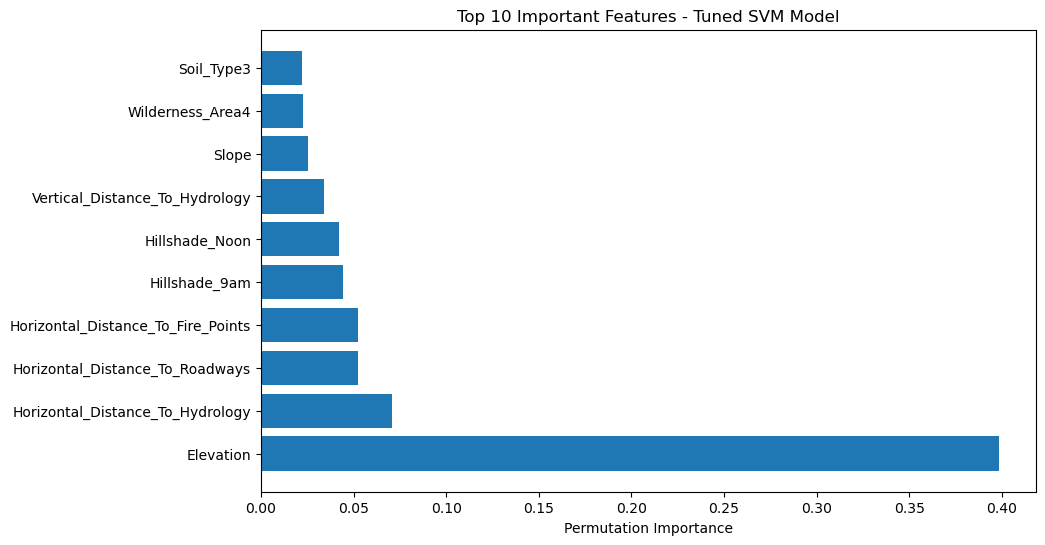

In [58]:
from sklearn.inspection import permutation_importance

# Assuming you have the best SVM model stored in best_svm_estimator
svm_permutation_importance = permutation_importance(best_svm_estimator, xtest, ytest, n_repeats=5, random_state=42)
feature_names = df.columns
# Get the indices of features sorted by their importance
sorted_idx = svm_permutation_importance.importances_mean.argsort()[::-1]

# Get the names of the features
important_feature_names = feature_names[sorted_idx]

# Print and visualize the important features
print("Important Features:")
print(important_feature_names[:10])

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(10), svm_permutation_importance.importances_mean[sorted_idx][:10], align="center")
plt.yticks(range(10), important_feature_names[:10])
plt.xlabel("Permutation Importance")
plt.title("Top 10 Important Features - Tuned SVM Model")
plt.show()

The feature importance analysis reveals that certain environmental and geographical attributes play a crucial role in influencing the predictions of the tuned SVM model. The top 10 important features include 'Elevation,' 'Horizontal_Distance_To_Hydrology,' 'Horizontal_Distance_To_Roadways,' 'Horizontal_Distance_To_Fire_Points,' 'Hillshade_9am,' 'Hillshade_Noon,' 'Vertical_Distance_To_Hydrology,' 'Slope,' 'Wilderness_Area4,' and 'Soil_Type3.' These features contribute significantly to the model's decision-making process, emphasizing their impact on accurately classifying forest cover types. Understanding the importance of these features provides valuable insights for further analysis and interpretation of the model's behavior

## Conclusion

In conclusion, our project aimed at forest cover type prediction has led us to the development of a robust machine learning model. After an extensive exploration of various classifiers and tuning techniques, the Tuned Support vector machine emerged as our final model. This model, with an accuracy of 79.00%, strikes a balance between predictive performance and simplicity.
The Tuned Support vector machine not only demonstrated high accuracy on the testing set but also offers interpretability crucial for understanding feature importance in forest cover type prediction. Its capability to generalize well to new data, coupled with a reasonable drop in accuracy from training to testing, makes it a practical choice for real-world deployment.

This project showcases the significance of thoughtful model selection, hyperparameter tuning, and the trade-off between complexity and interpretability. The Tuned Support vector machine stands out as a reliable solution for forest cover type detection, with the potential for practical applications in environmental monitoring and conservation efforts.